In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [49]:
print(os.getcwd())

d:\Python\Projects\Time_series_Stat_vs_DL\notebooks


In [50]:
base_path = os.path.dirname(os.getcwd())
path = os.path.join(base_path,"Data", "Original_data.csv")
data = pd.read_csv(path)
data.head()

country country_code year_week     level region region_name  new_cases  \
0  Austria           AT  2020-W01  national     AT     Austria        NaN   
1  Austria           AT  2020-W02  national     AT     Austria        NaN   
2  Austria           AT  2020-W03  national     AT     Austria        NaN   
3  Austria           AT  2020-W04  national     AT     Austria        NaN   
4  Austria           AT  2020-W05  national     AT     Austria        NaN   

   tests_done  population  testing_rate  positivity_rate testing_data_source  
0         NaN     8932664           NaN              NaN                 NaN  
1         NaN     8932664           NaN              NaN                 NaN  
2         NaN     8932664           NaN              NaN                 NaN  
3         NaN     8932664           NaN              NaN                 NaN  
4         NaN     8932664           NaN              NaN                 NaN

In [51]:
data.isnull().sum()

country                  0
country_code             0
year_week                0
level                    0
region                   0
region_name              0
new_cases              433
tests_done             432
population               0
testing_rate           432
positivity_rate        476
testing_data_source    432
dtype: int64

In [52]:
numeric_cols = ['tests_done', 'testing_rate', 'positivity_rate', 'new_cases', 'population']
for col in numeric_cols:
    if col in data.columns and data[col].isnull().sum() > 0:
        data[col] = data.groupby('country')[col].transform(
    lambda x: x.fillna(x.median()))
data.isnull().sum()

country                  0
country_code             0
year_week                0
level                    0
region                   0
region_name              0
new_cases                0
tests_done               0
population               0
testing_rate             0
positivity_rate          0
testing_data_source    432
dtype: int64

In [53]:
def parse_year_week(year_week_str):
    """Convert YYYY-WXX format to datetime."""
    try:
        return pd.to_datetime(year_week_str + '-1', format='%Y-W%W-%w')
    except ValueError:
        # Handle edge cases (week 53, etc.)
        year, week = year_week_str.split('-W')
        week_num = min(int(week), 52)
        return pd.to_datetime(f"{year}-W{week_num:02d}-1", format='%Y-W%W-%w')

# Convert year_week to datetime for the entire dataset
data['datetime'] = data['year_week'].apply(parse_year_week)

# Sort by country and time
data = data.sort_values(['country', 'datetime']).reset_index(drop=True)
# Save the cleaned data to a new CSV file
output_path = os.path.join(base_path, "Data", "Cleaned_data.csv")
data.to_csv(output_path, index=False)

In [54]:
data = data.drop(['country_code', 'level', 'region', 'region_name', 'testing_data_source', 'year_week'], axis=1)
data.head()

country  new_cases  tests_done  population  testing_rate  positivity_rate  \
0  Austria    18490.5    989780.0     8932664  11080.457075         1.792459   
1  Austria    18490.5    989780.0     8932664  11080.457075         1.792459   
2  Austria    18490.5    989780.0     8932664  11080.457075         1.792459   
3  Austria    18490.5    989780.0     8932664  11080.457075         1.792459   
4  Austria    18490.5    989780.0     8932664  11080.457075         1.792459   

    datetime  
0 2020-01-06  
1 2020-01-13  
2 2020-01-20  
3 2020-01-27  
4 2020-02-03

In [59]:
def scaler(data):
    mean = data.mean()
    std = data.std()
    return (data - mean) / std

numeric_cols_1 = ['tests_done', 'testing_rate', 'positivity_rate', 'new_cases']    
for country in data['country'].unique():
    country_data = data[data['country'] == country]
    for col in numeric_cols_1:
        if col in country_data.columns:
            data.loc[data['country'] == country, col] = scaler(country_data[col])
# Save the scaled data to a new CSV file
data['population'] = scaler(data['population'])
output_scaled_path = os.path.join(base_path, "Data", "Scaled_data.csv")
data.to_csv(output_scaled_path, index=False)
scaled_data = pd.read_csv(output_scaled_path)
scaled_data.head()
scaled_data['datetime'] = pd.to_datetime(scaled_data['datetime'])
scaled_data.head()
scaled_data['datetime'].dtype


dtype('<M8[ns]')


 Decomposing time series for Austria


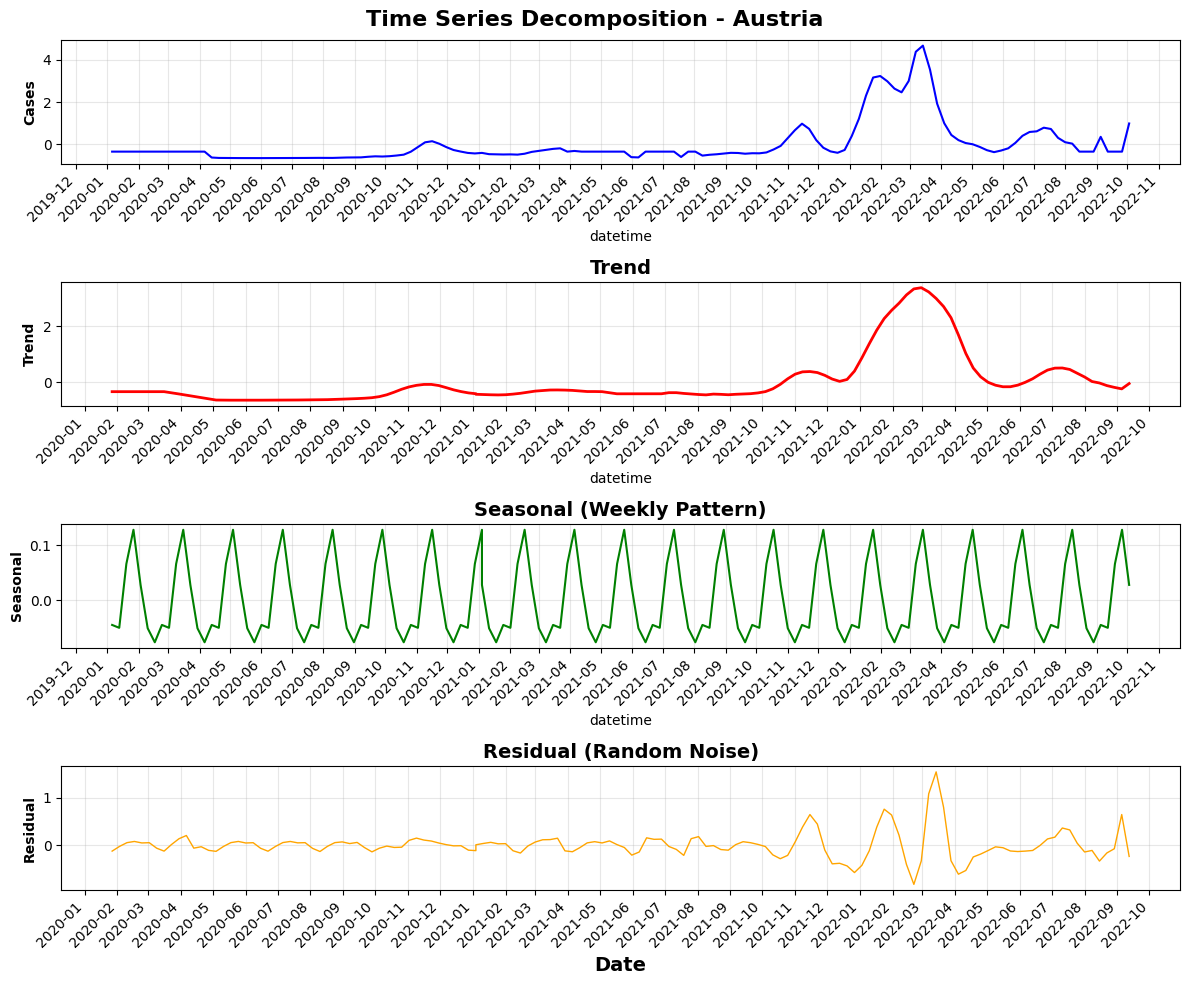


 Decomposing time series for Belgium


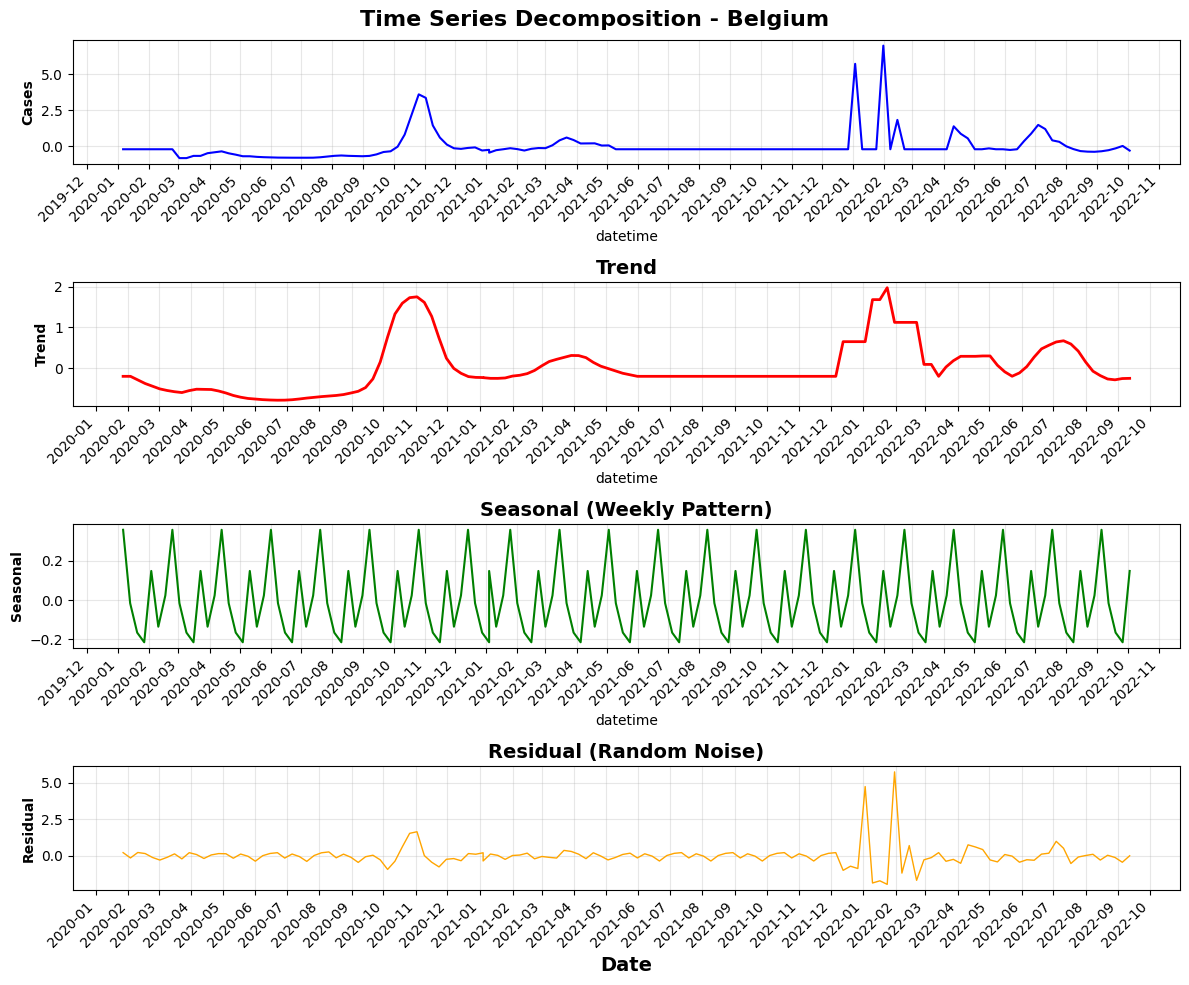


 Decomposing time series for Bulgaria


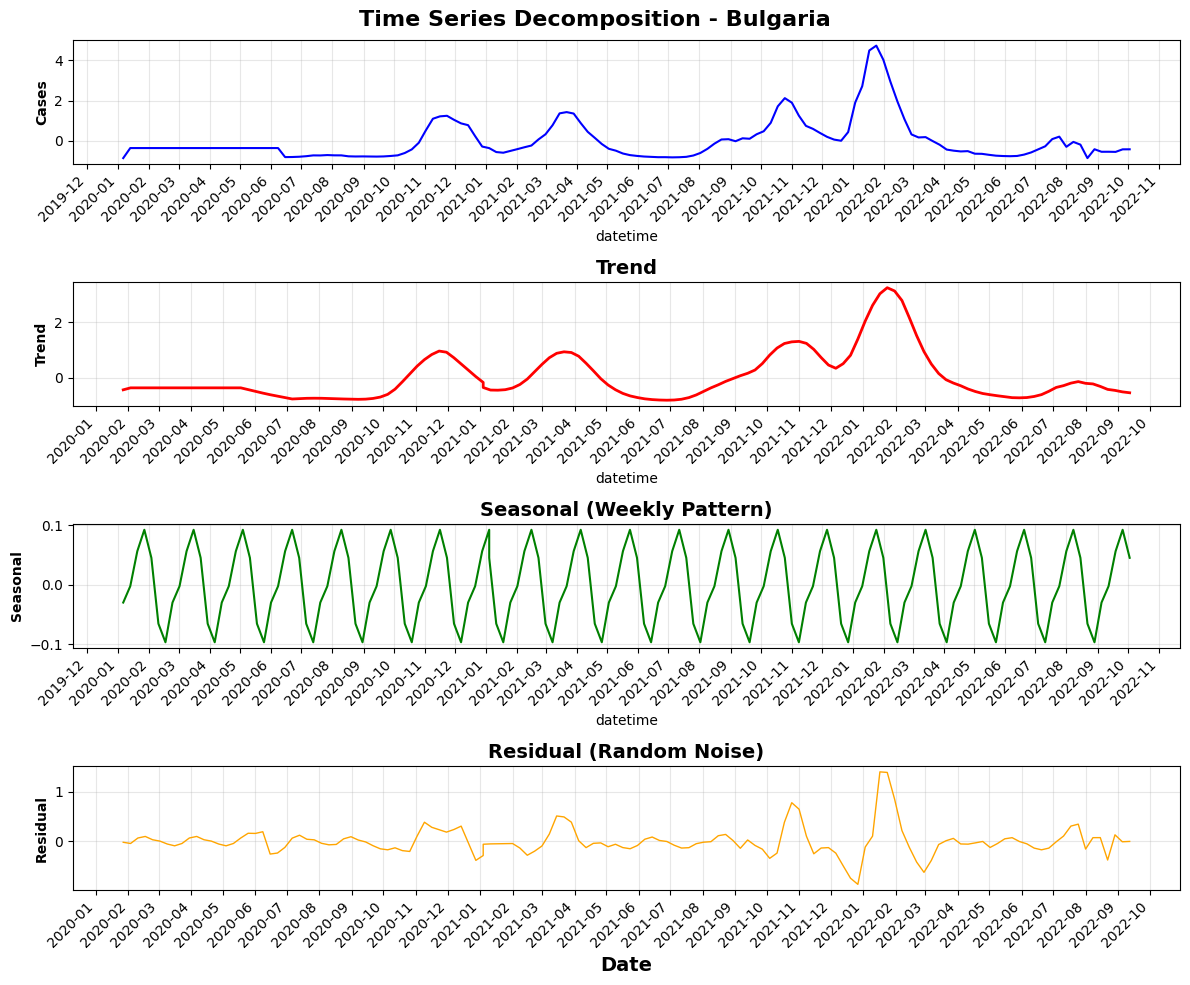


 Decomposing time series for Croatia


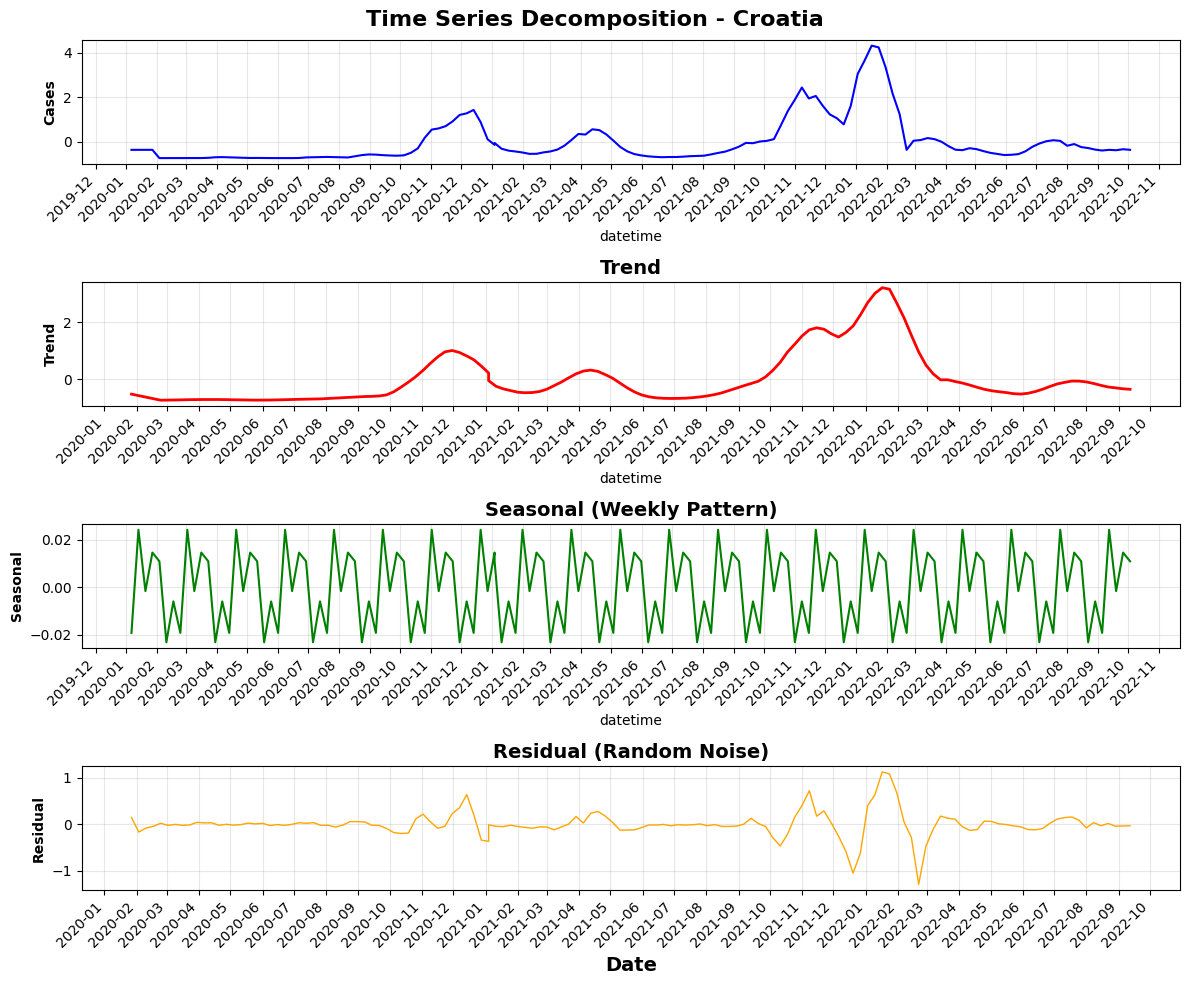


 Decomposing time series for Cyprus


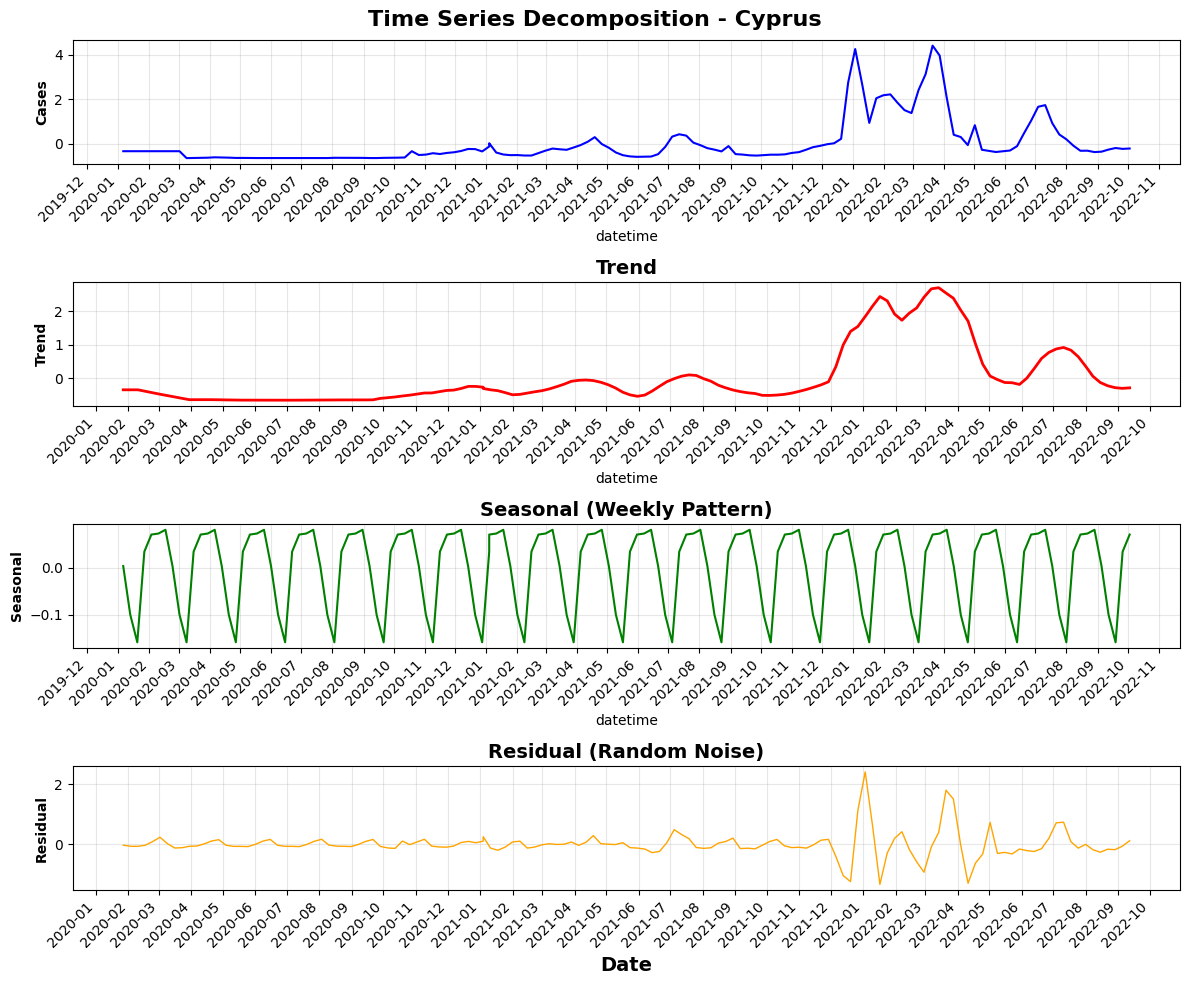


 Decomposing time series for Czechia


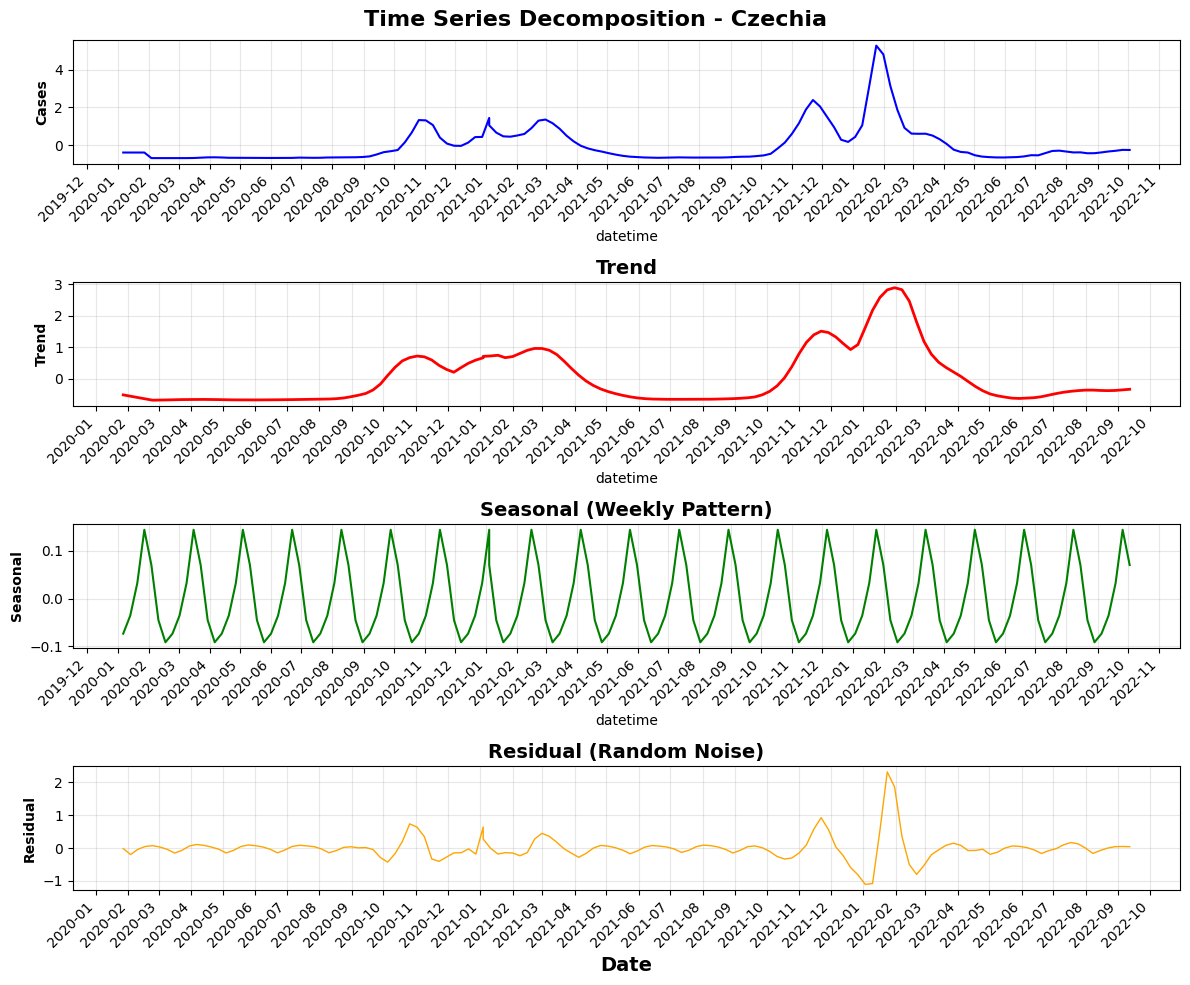


 Decomposing time series for Denmark


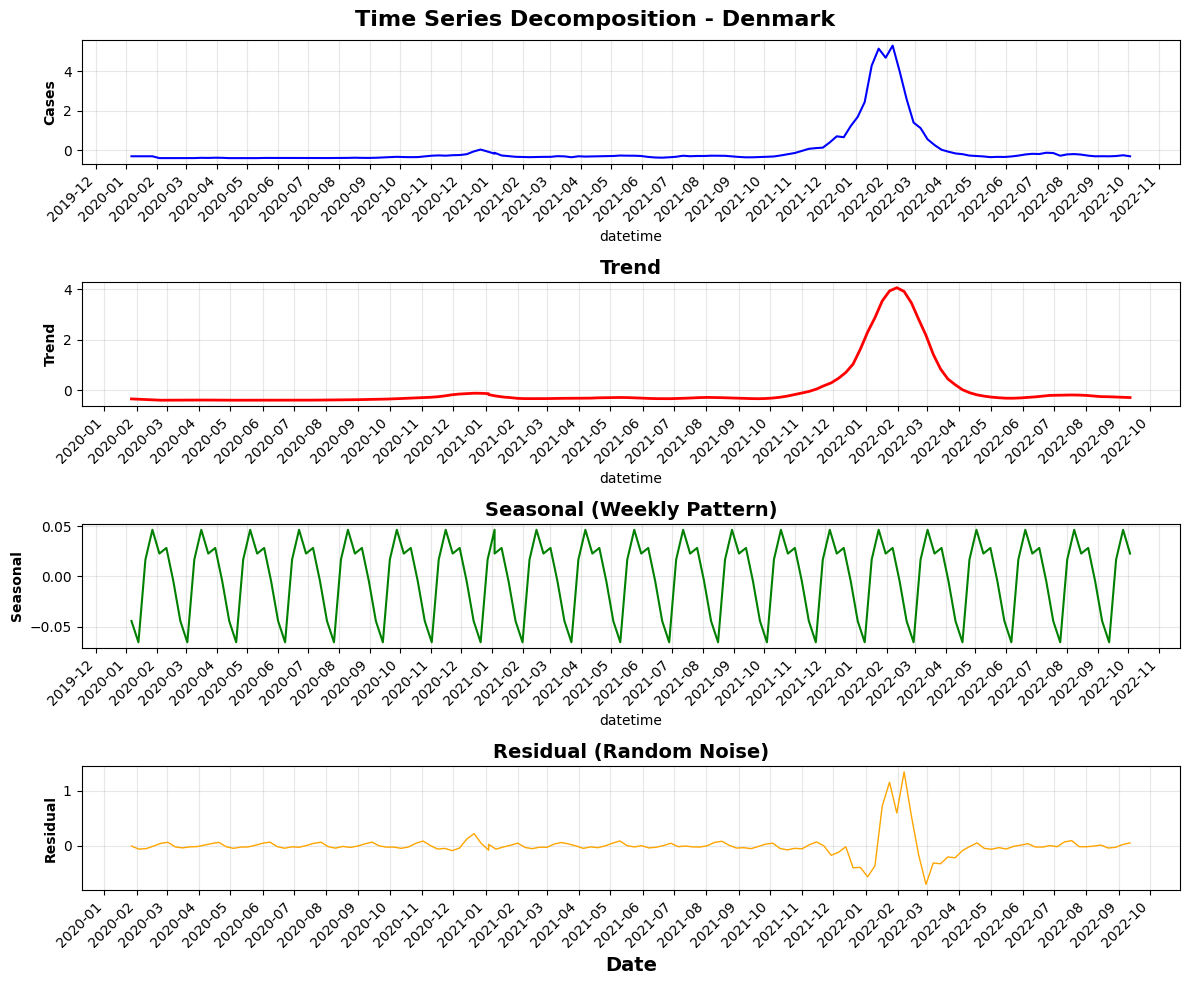


 Decomposing time series for Estonia


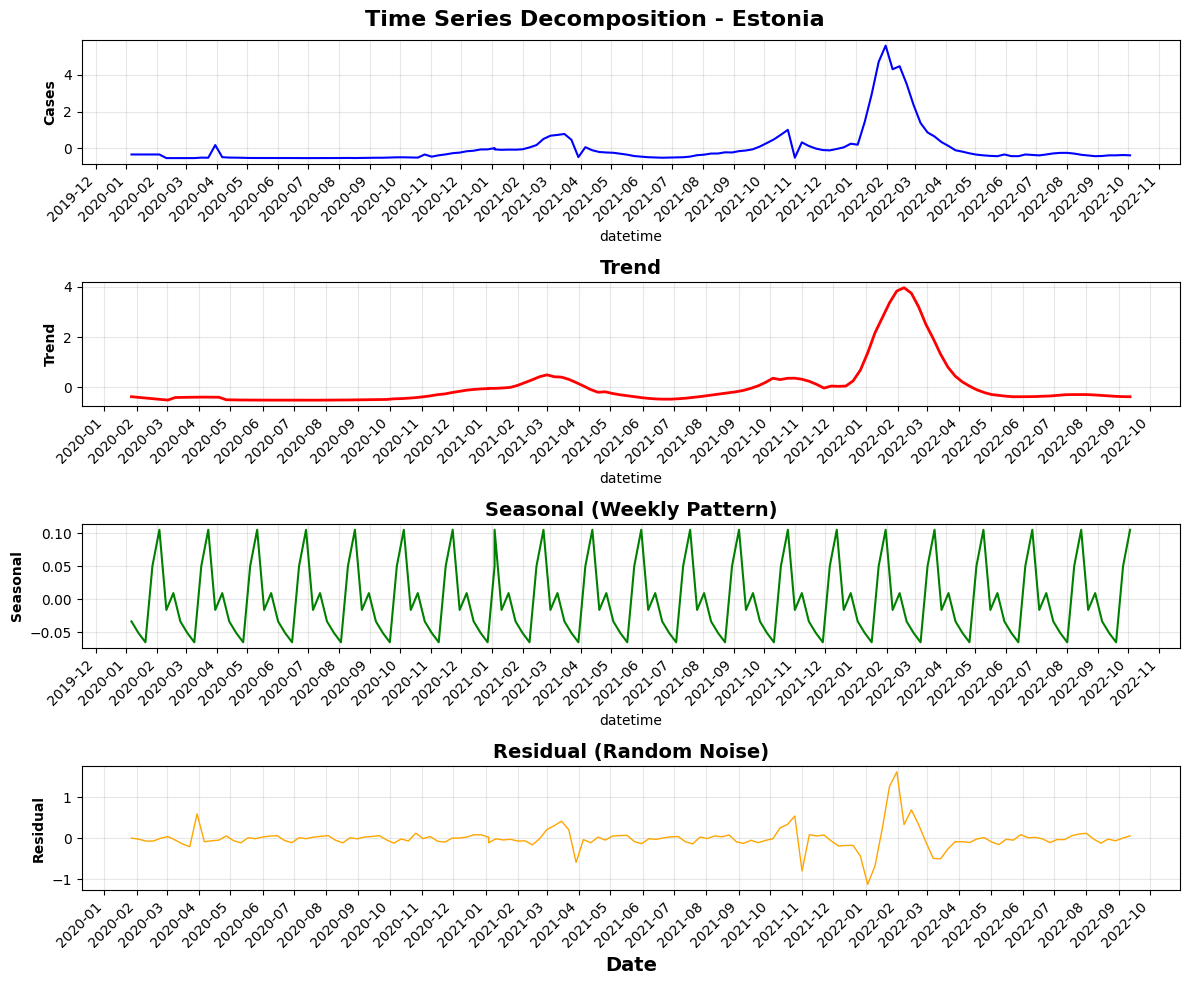


 Decomposing time series for Finland


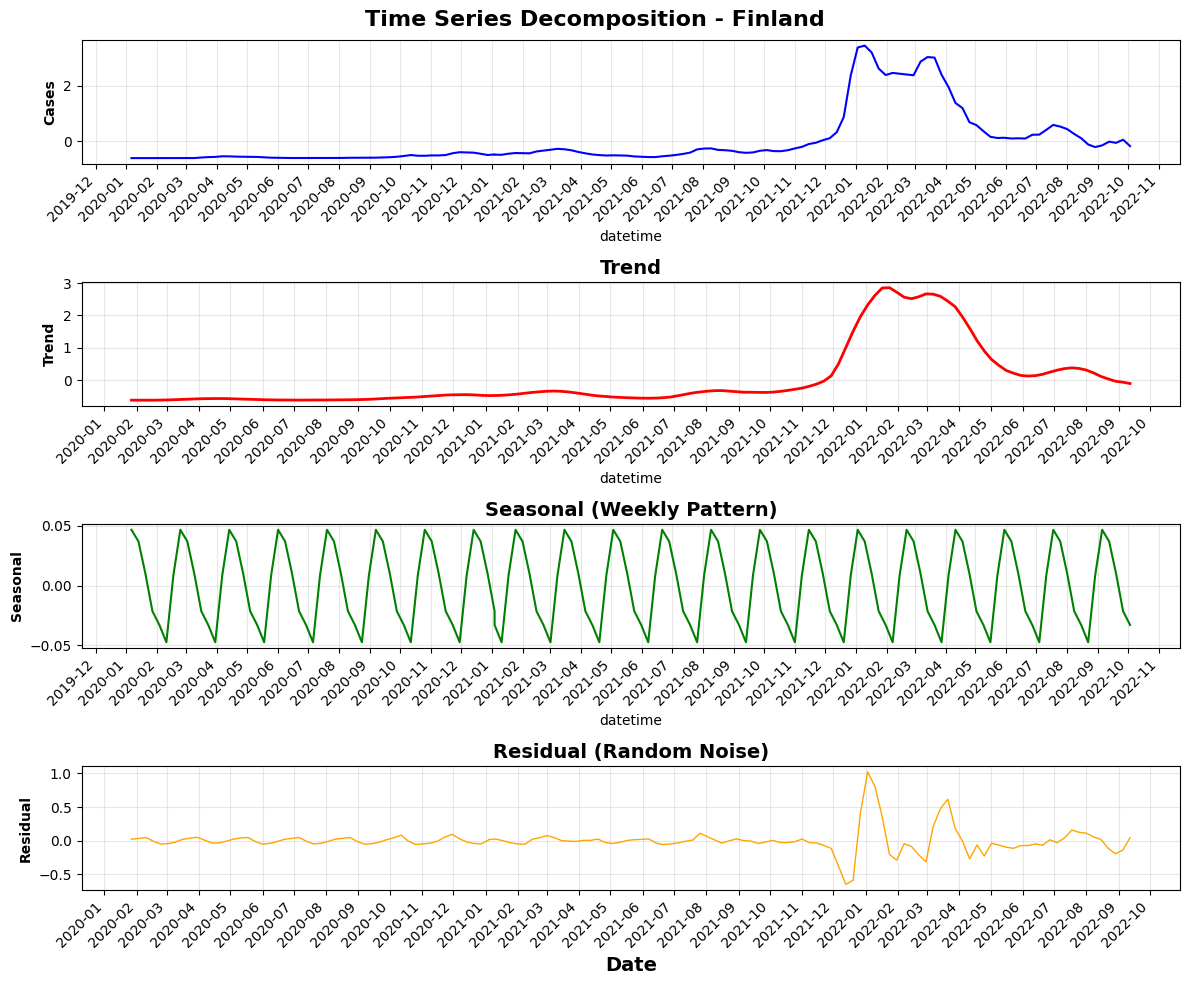


 Decomposing time series for France


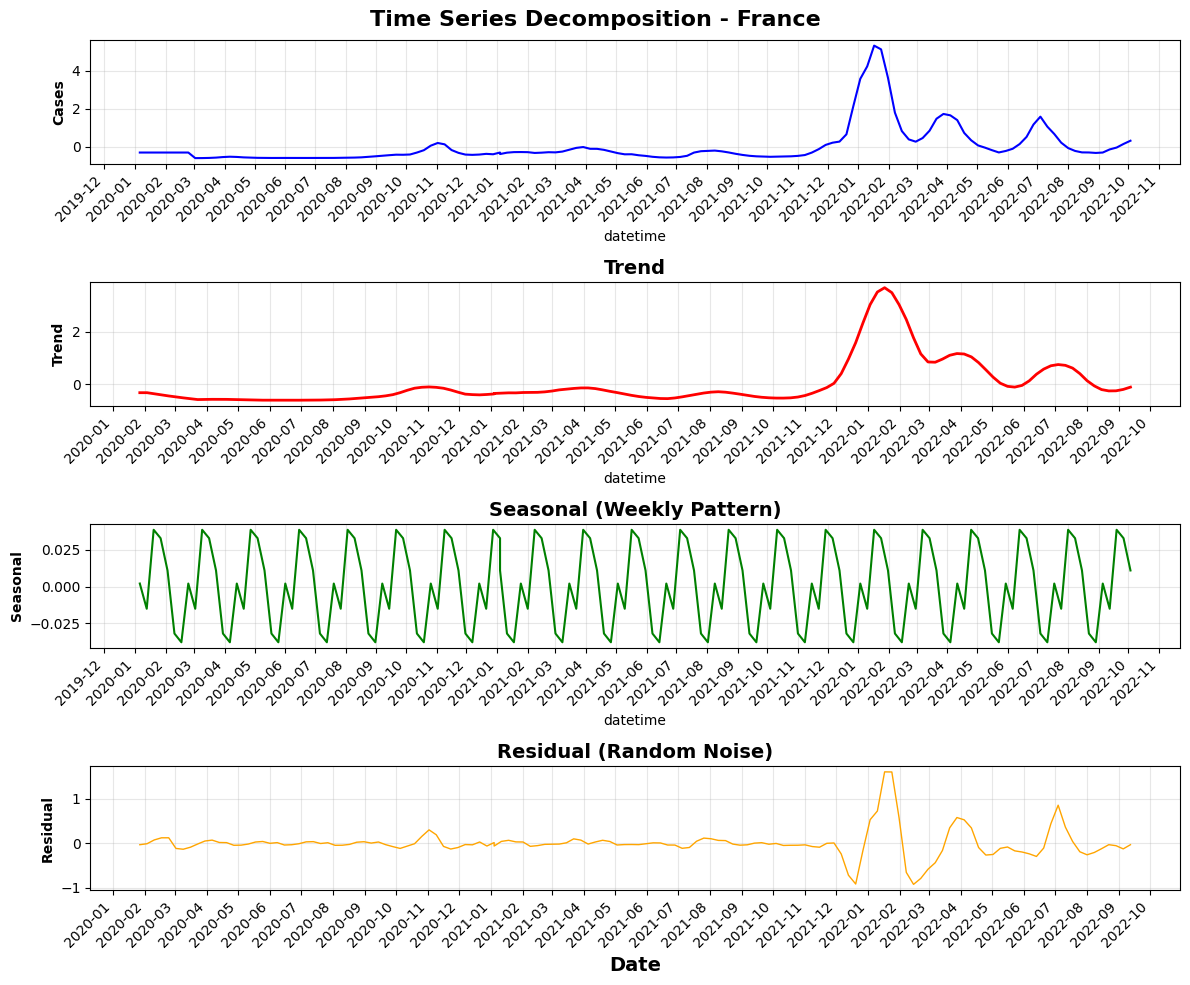


 Decomposing time series for Germany


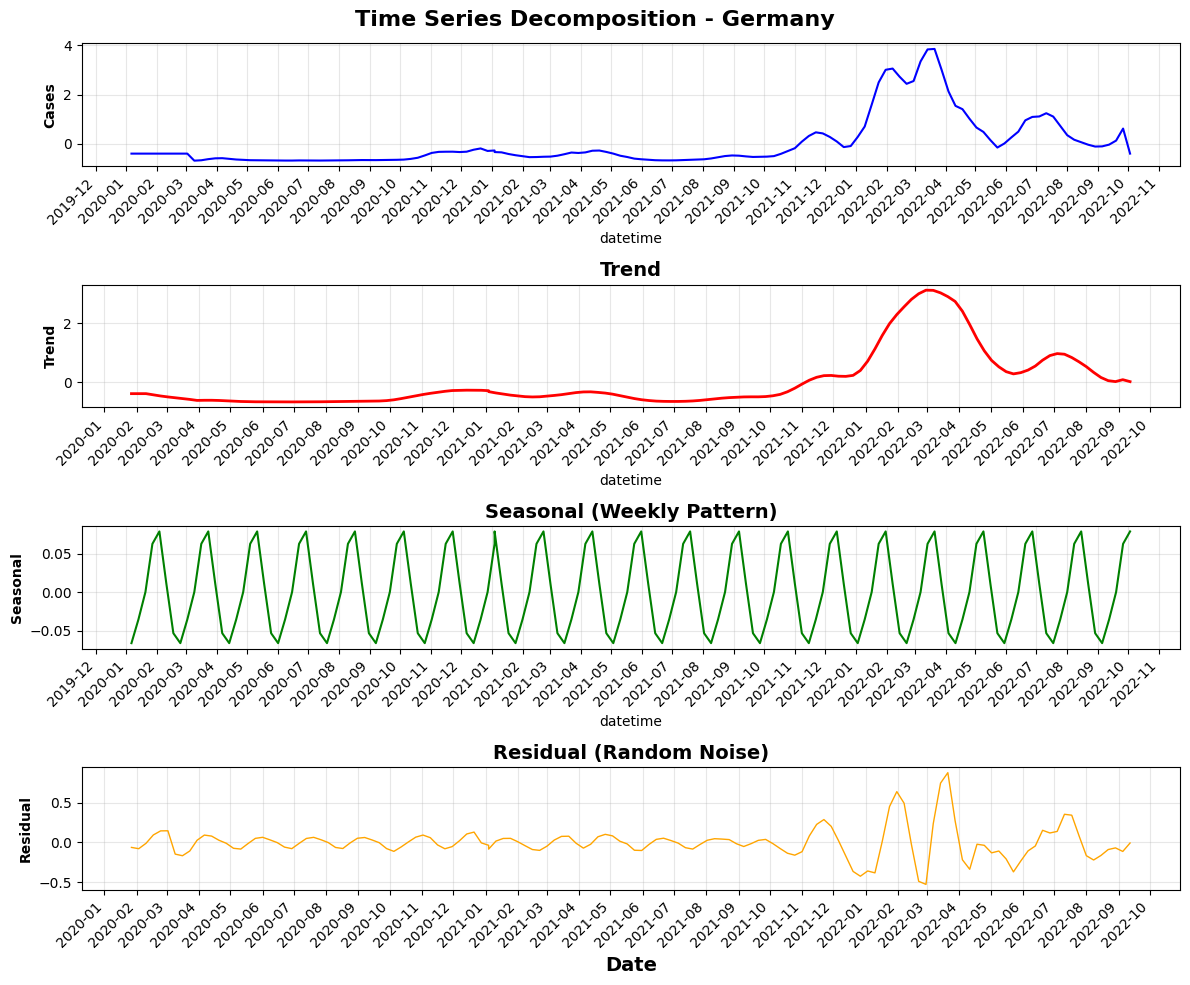


 Decomposing time series for Greece


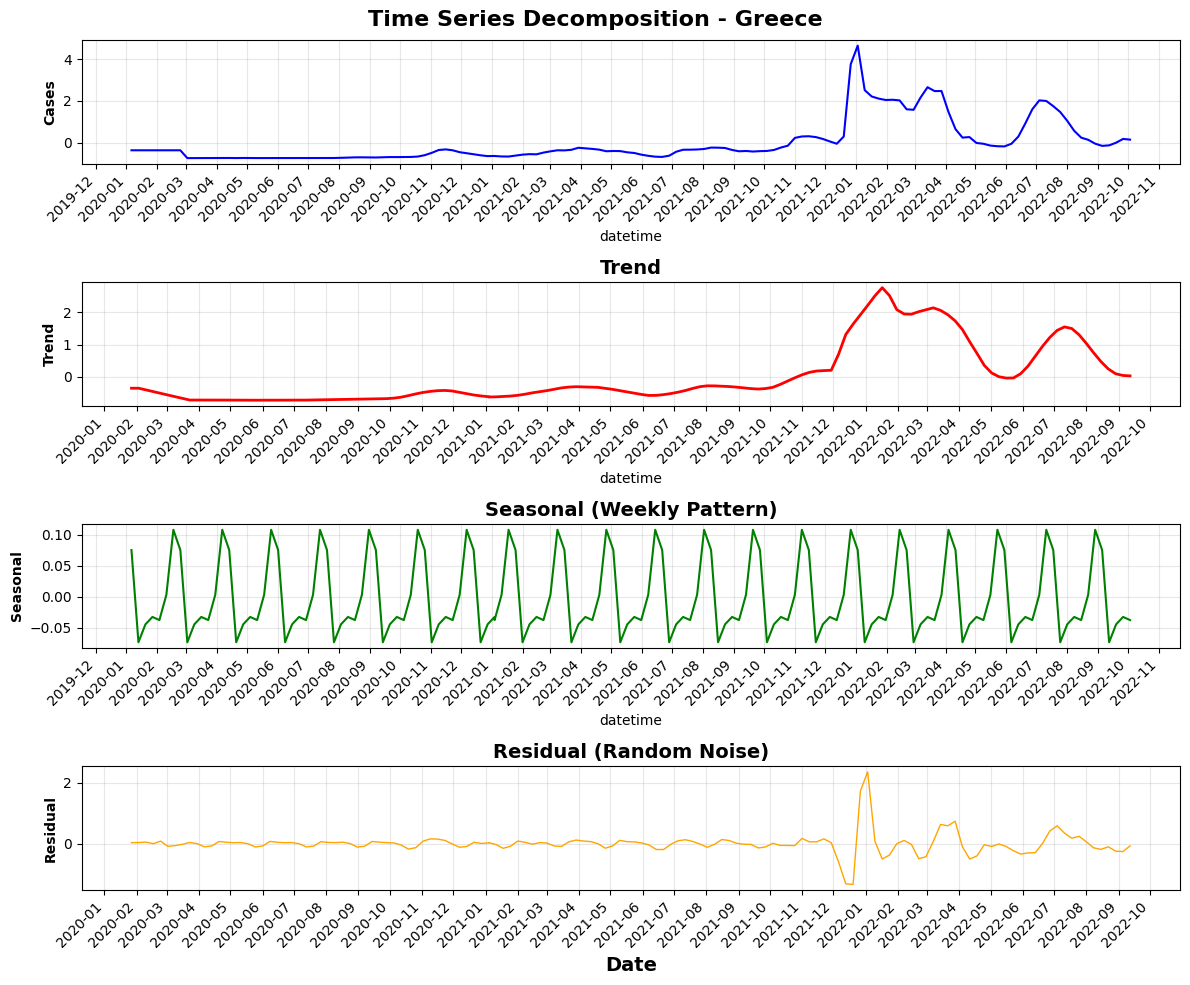


 Decomposing time series for Hungary


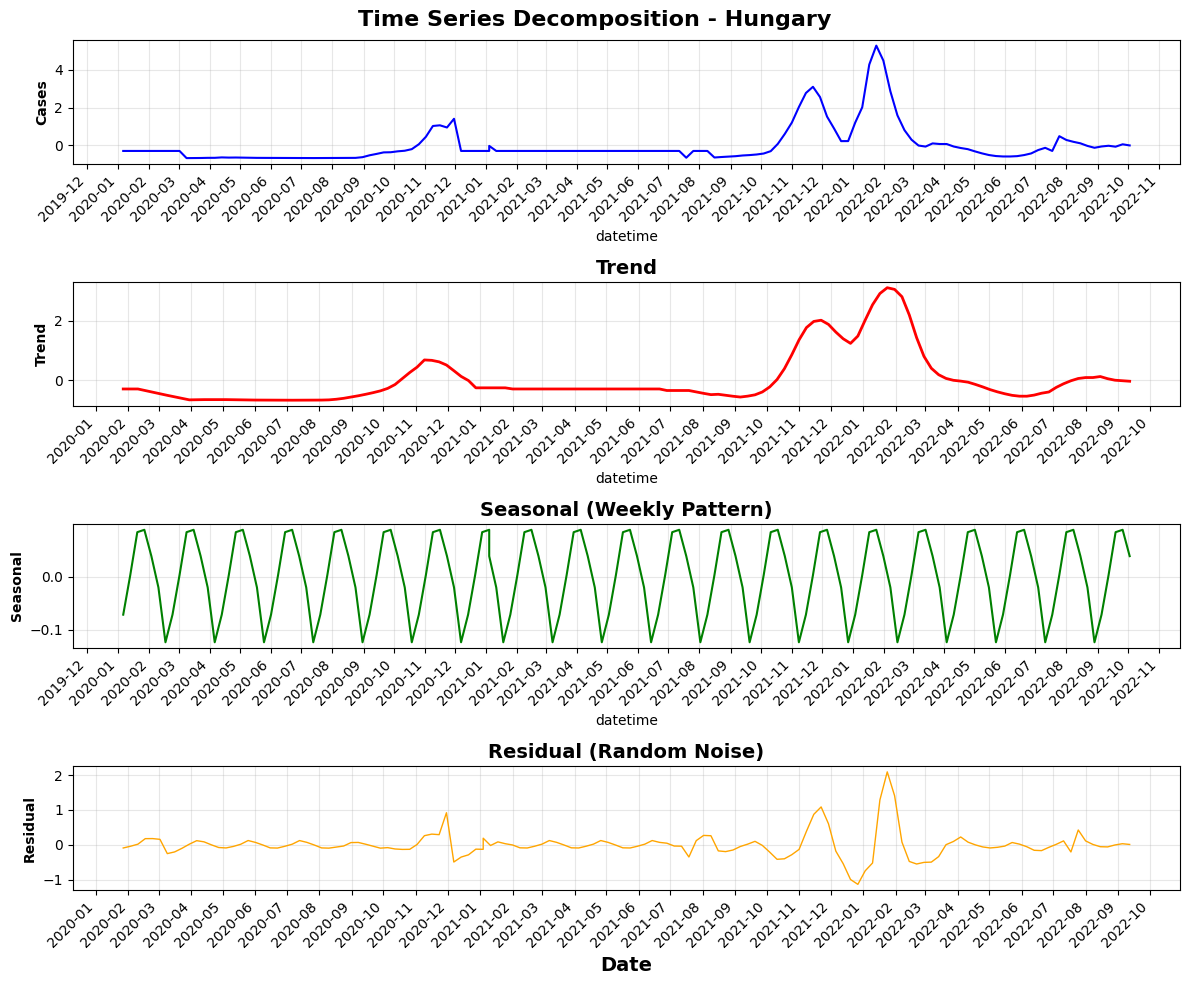


 Decomposing time series for Iceland


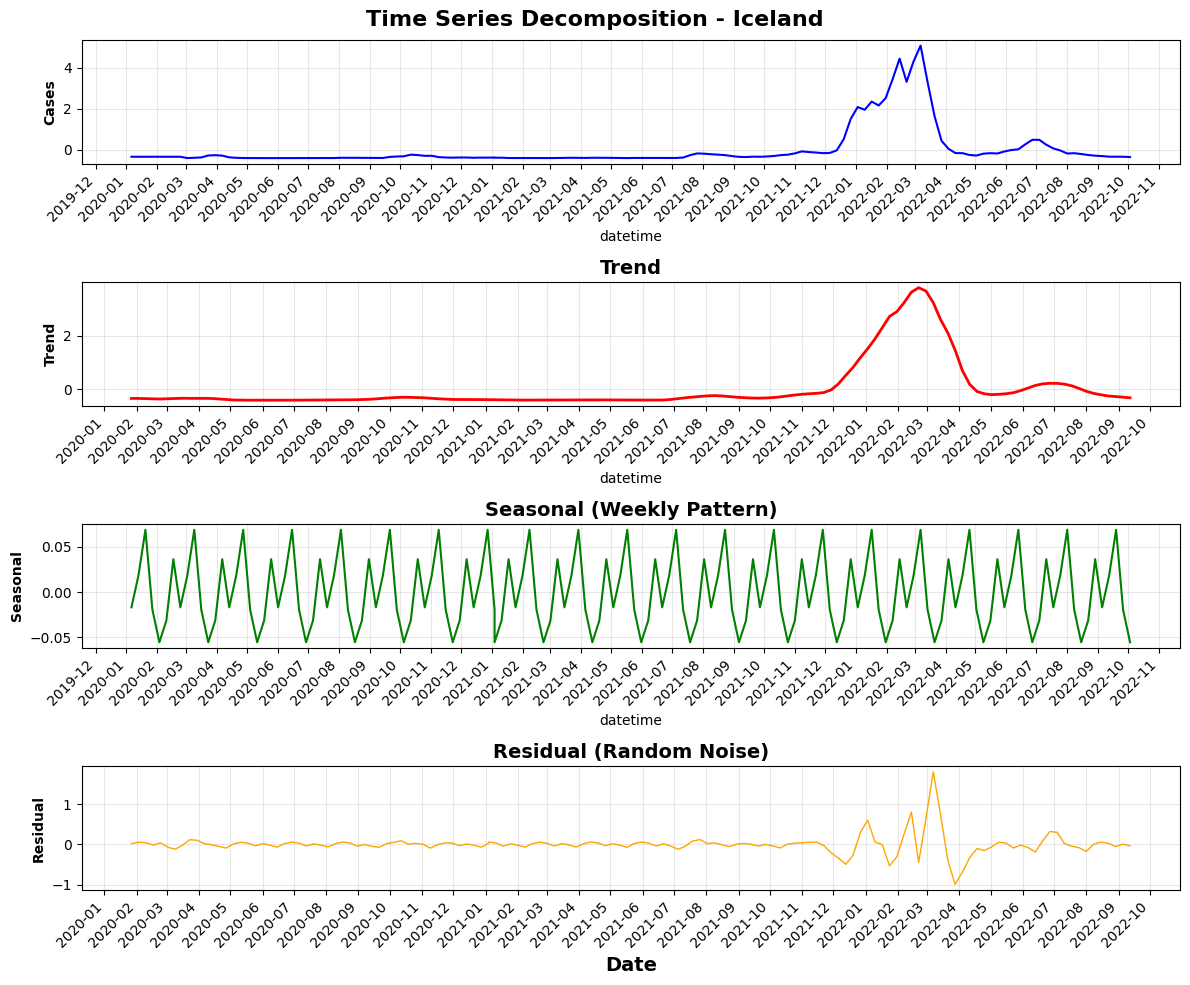


 Decomposing time series for Ireland


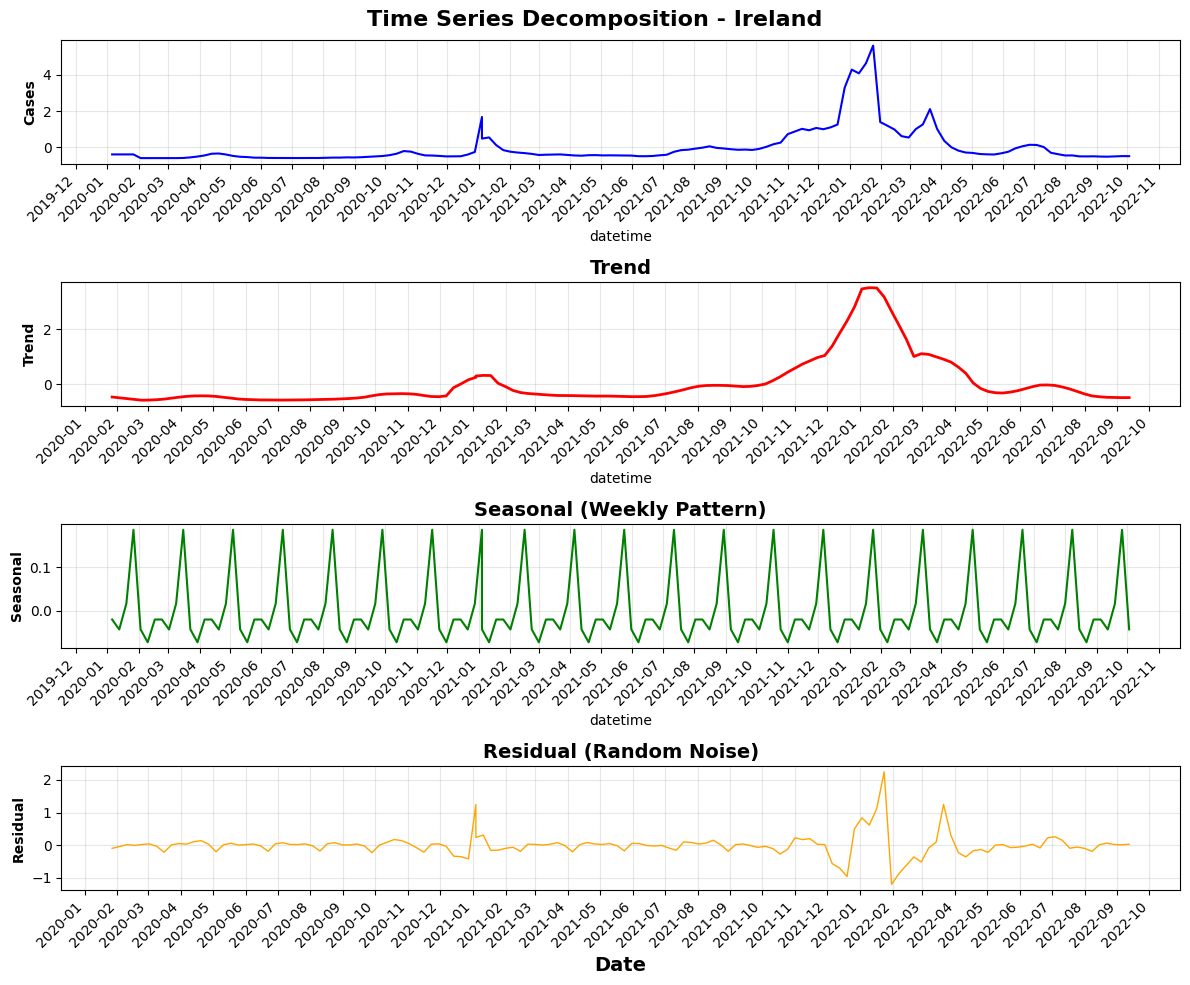


 Decomposing time series for Italy


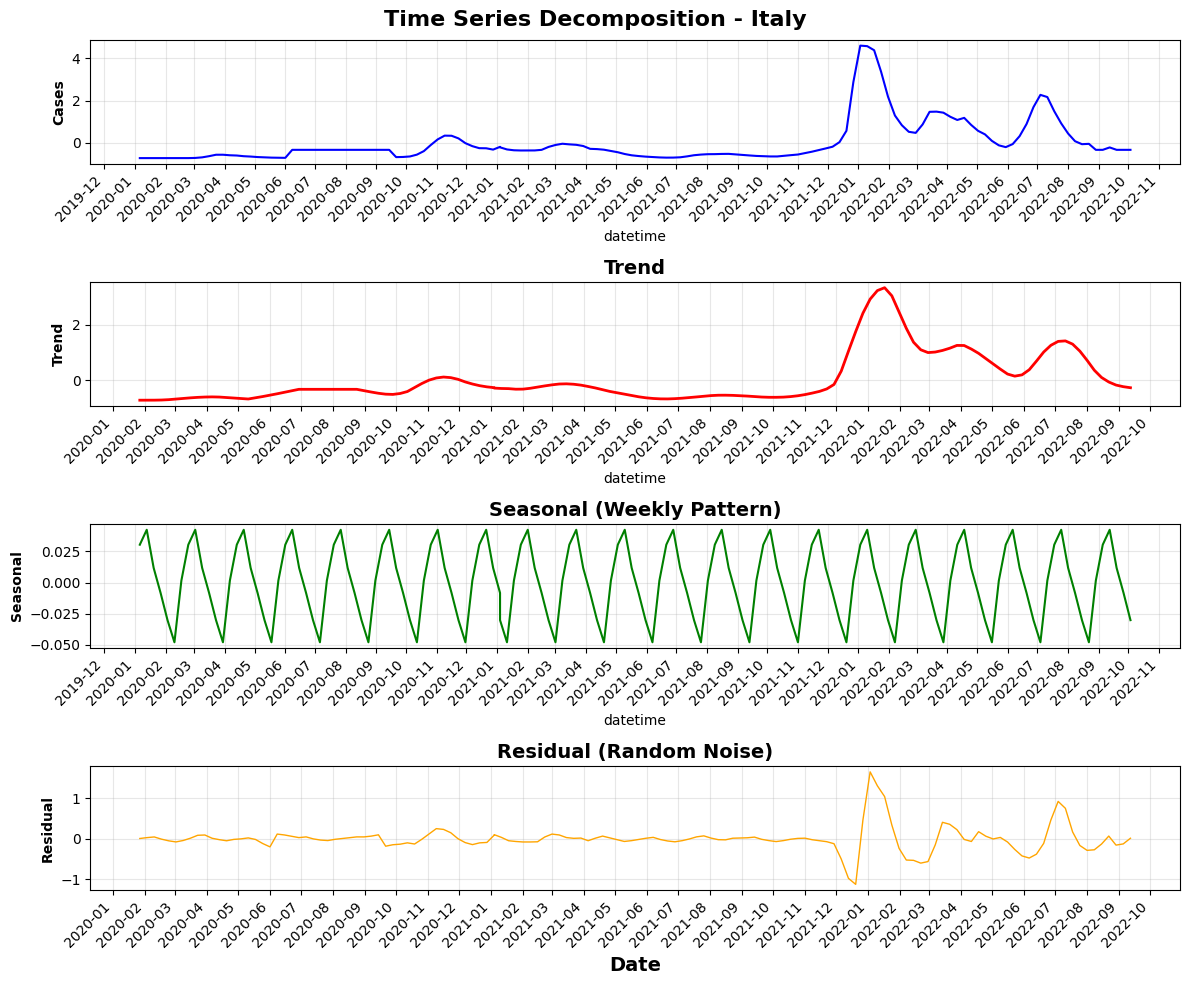


 Decomposing time series for Latvia


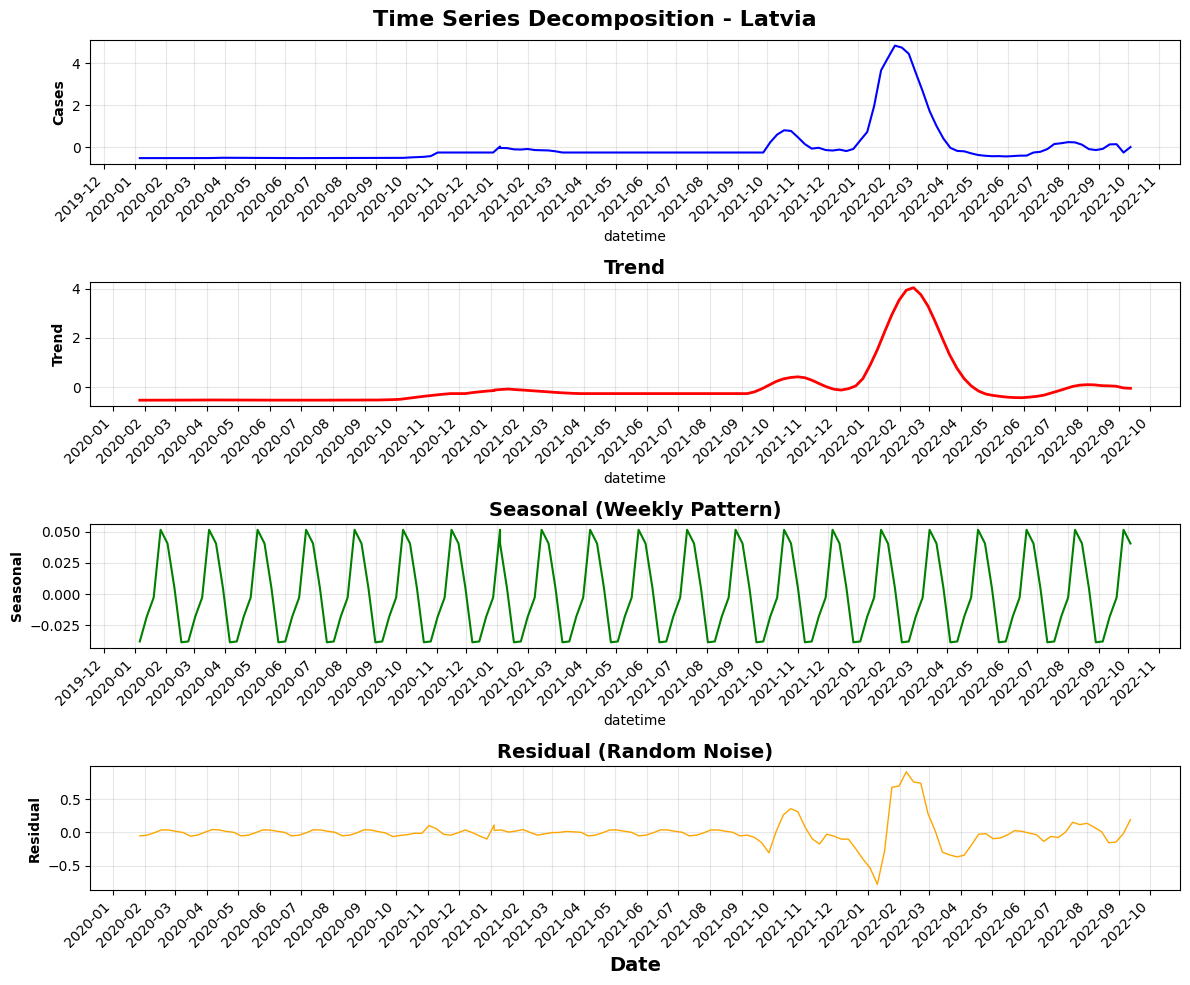


 Decomposing time series for Liechtenstein


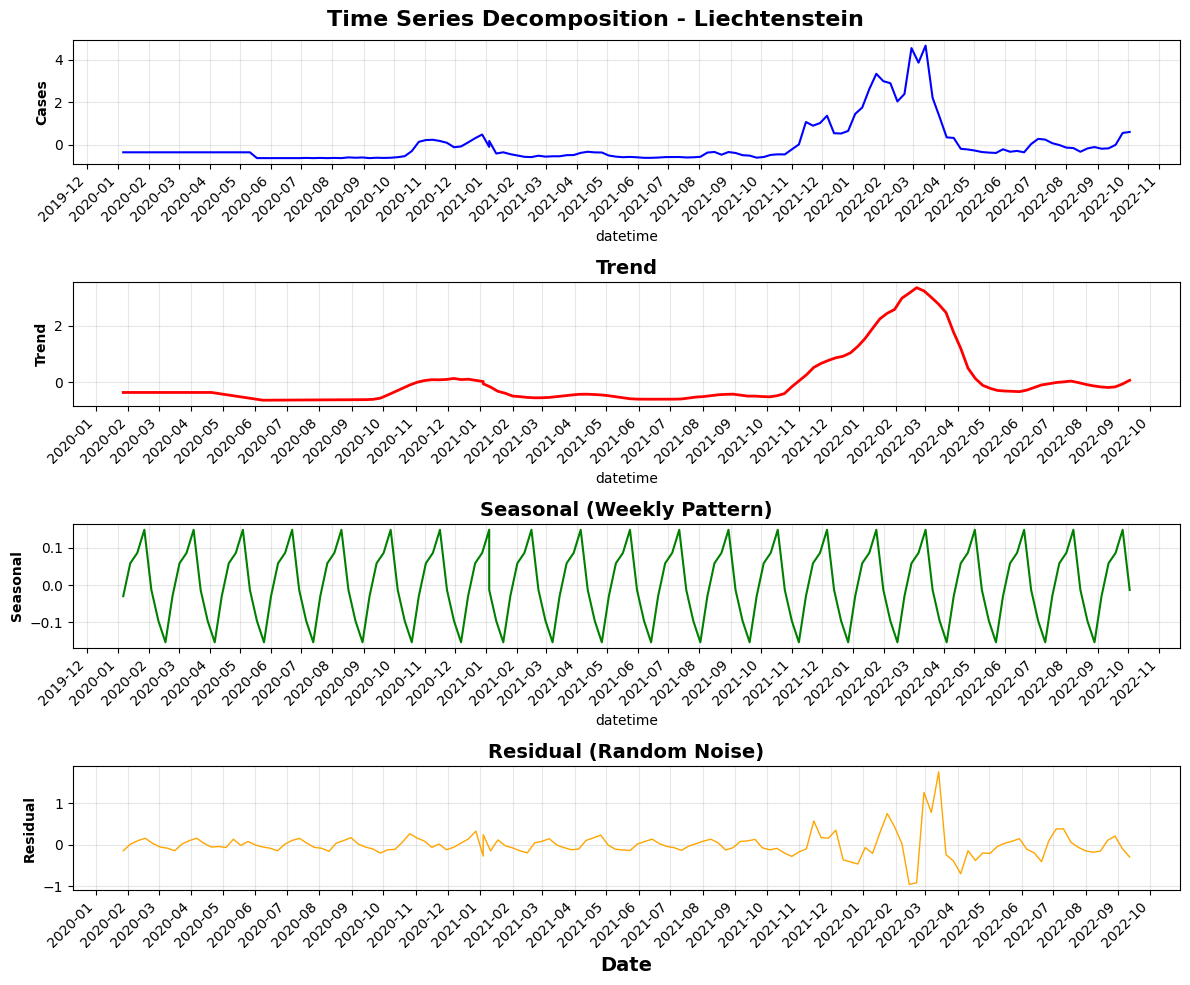


 Decomposing time series for Lithuania


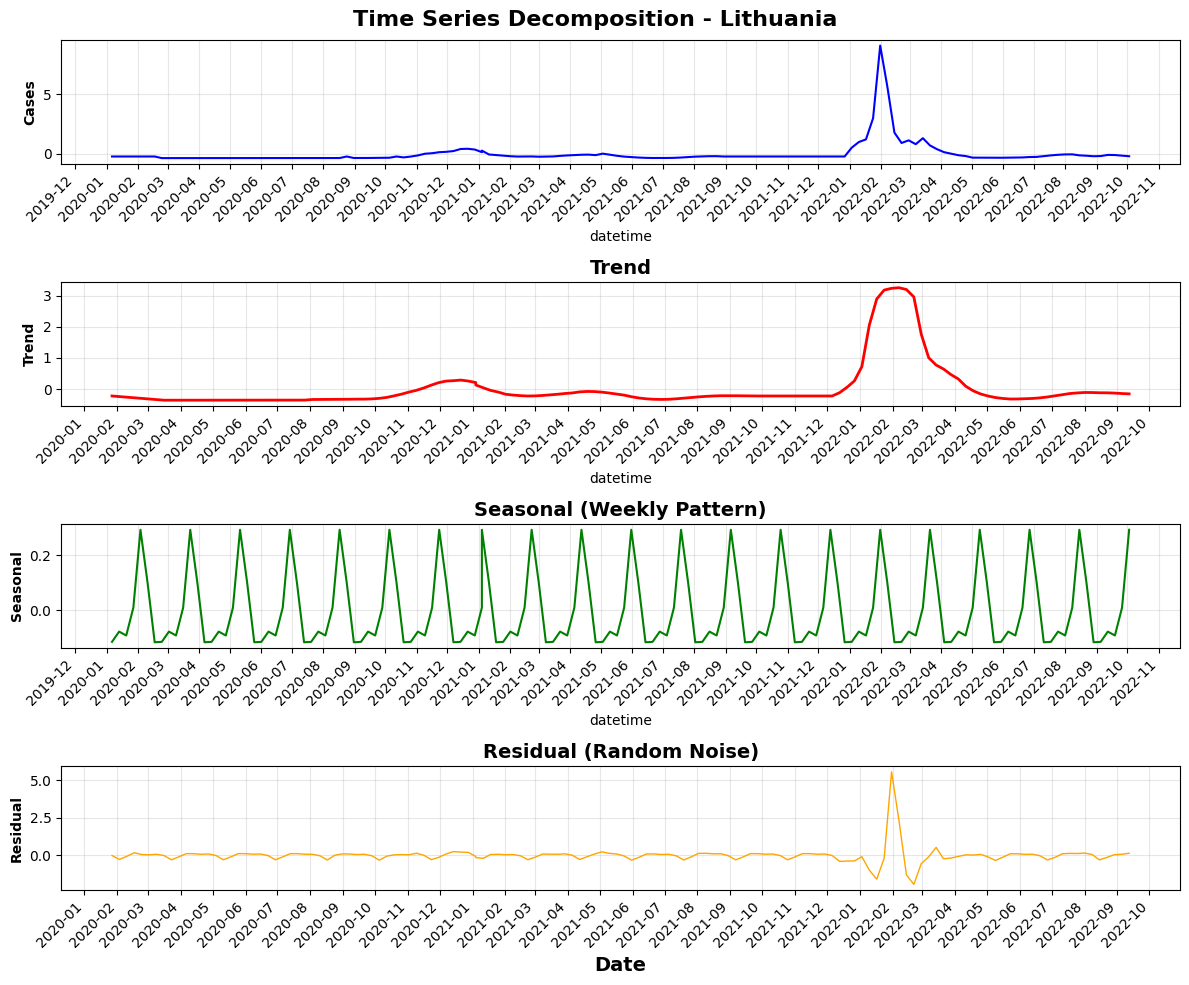


 Decomposing time series for Luxembourg


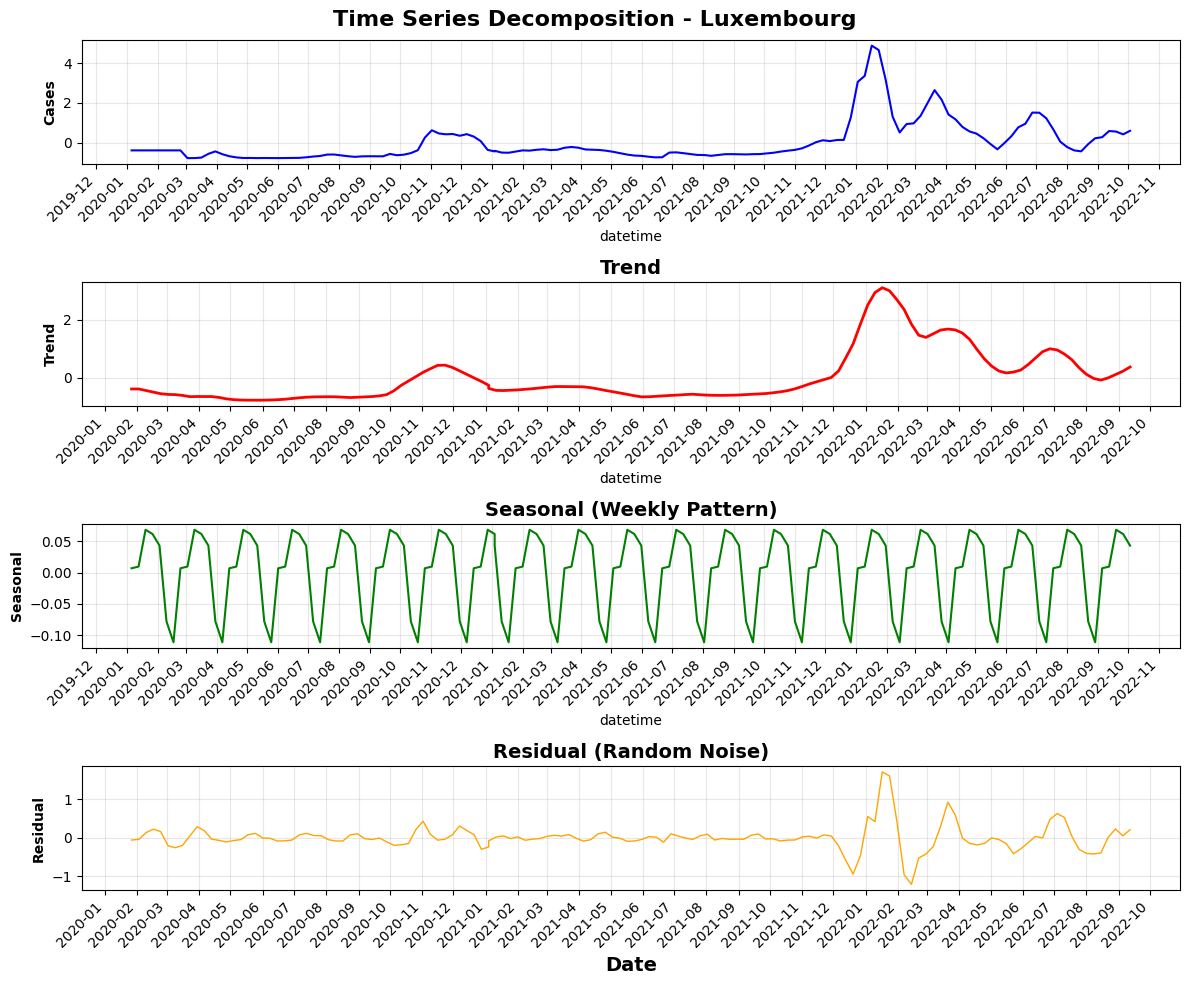


 Decomposing time series for Malta


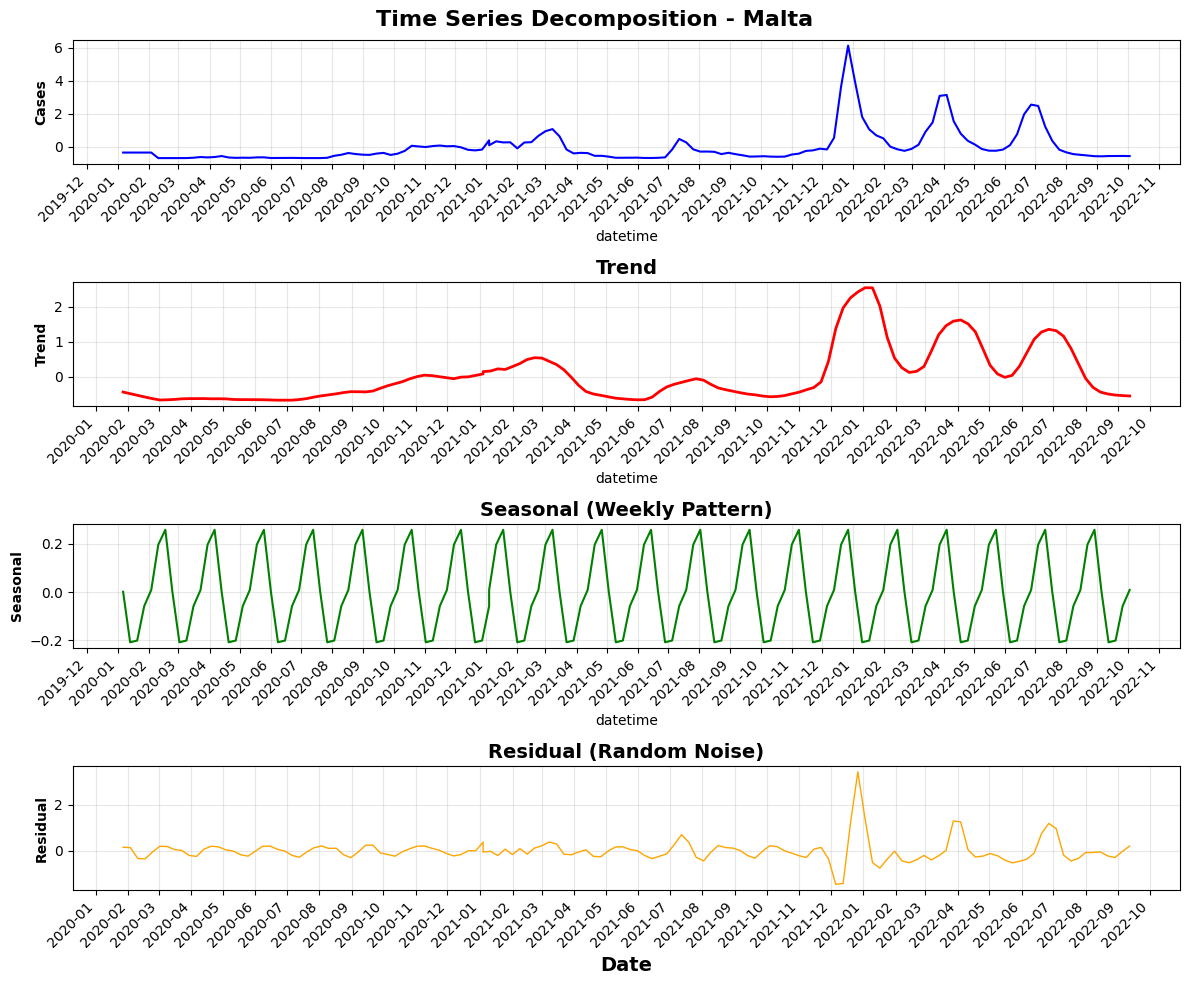


 Decomposing time series for Netherlands


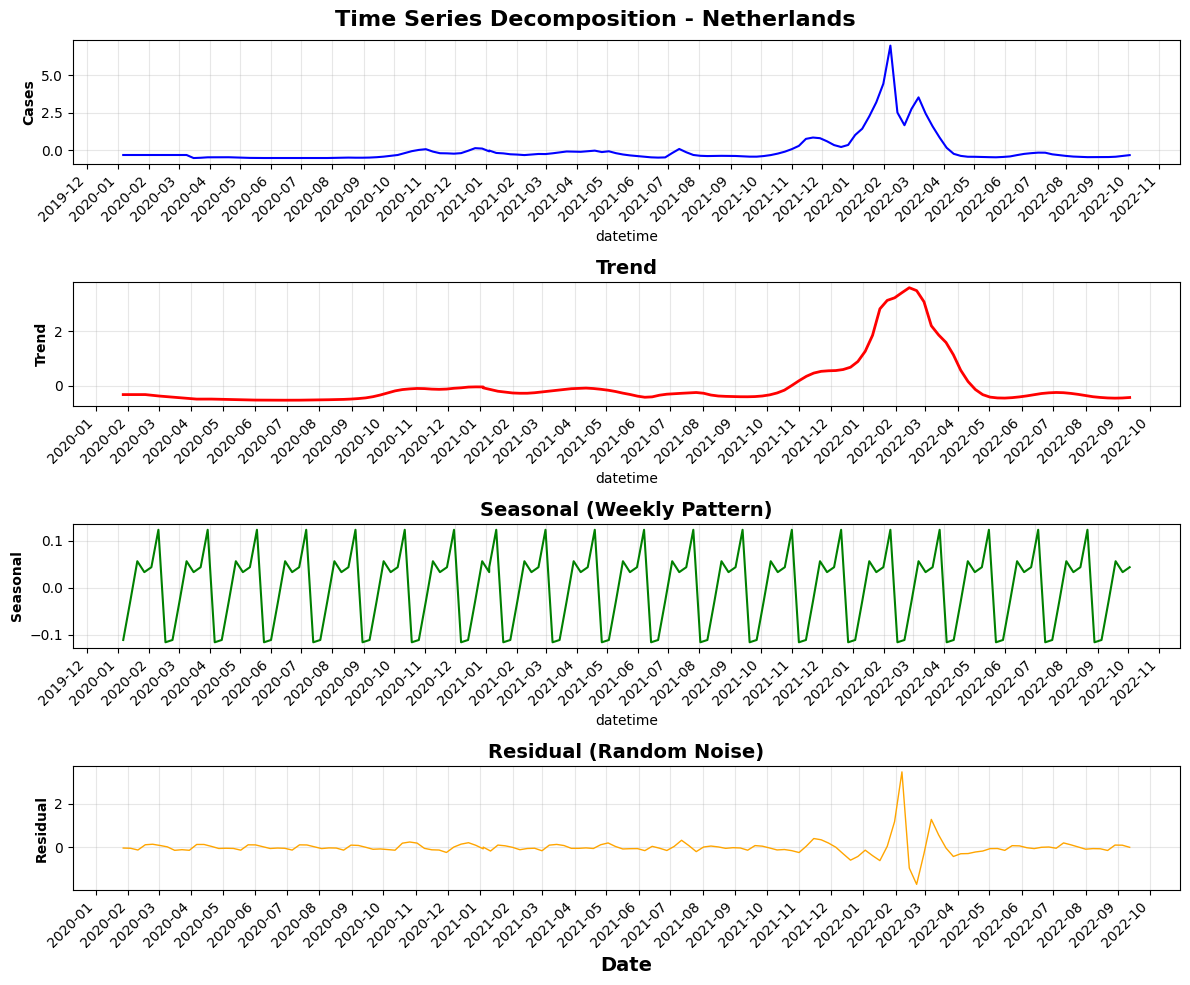


 Decomposing time series for Norway


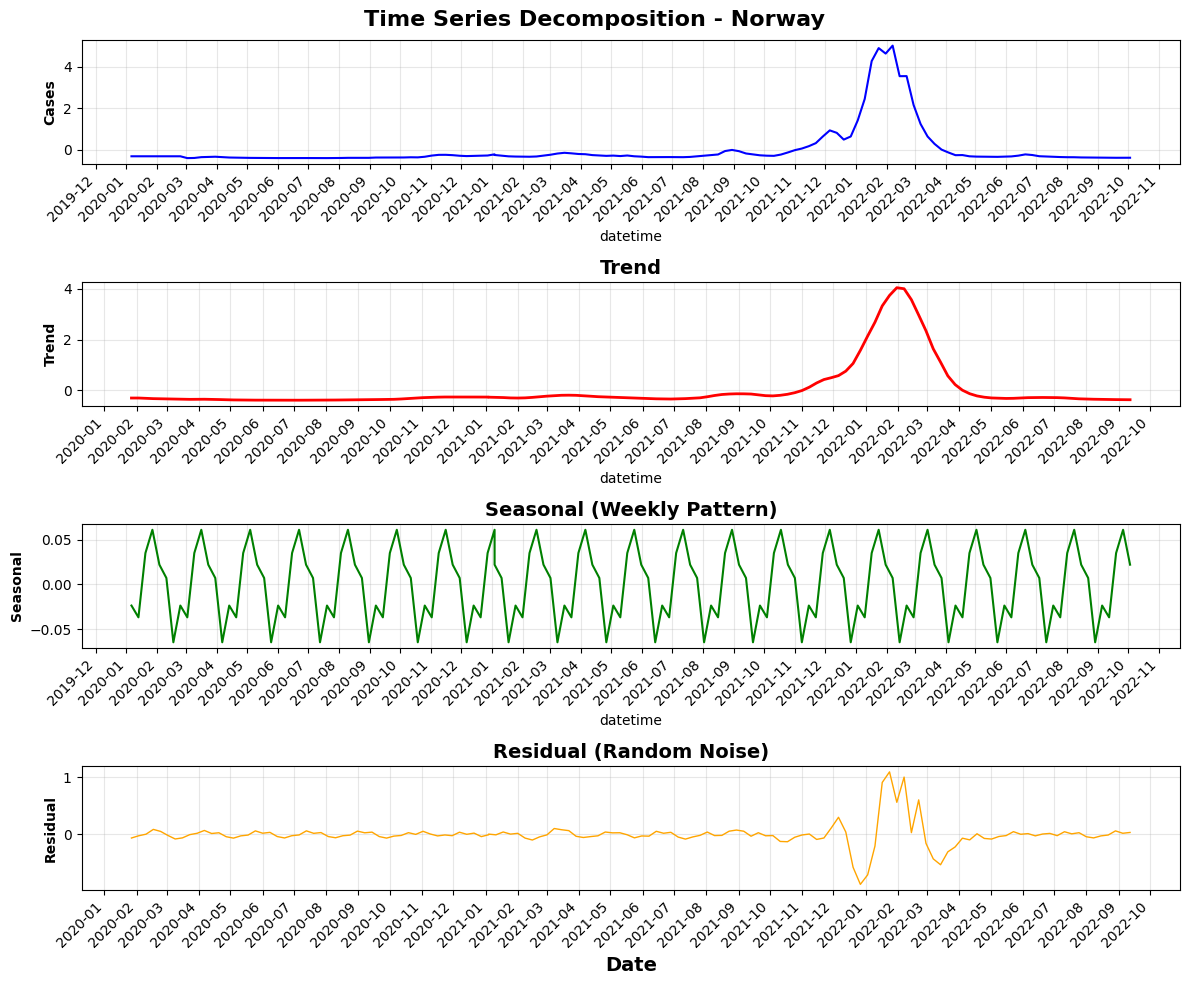


 Decomposing time series for Poland


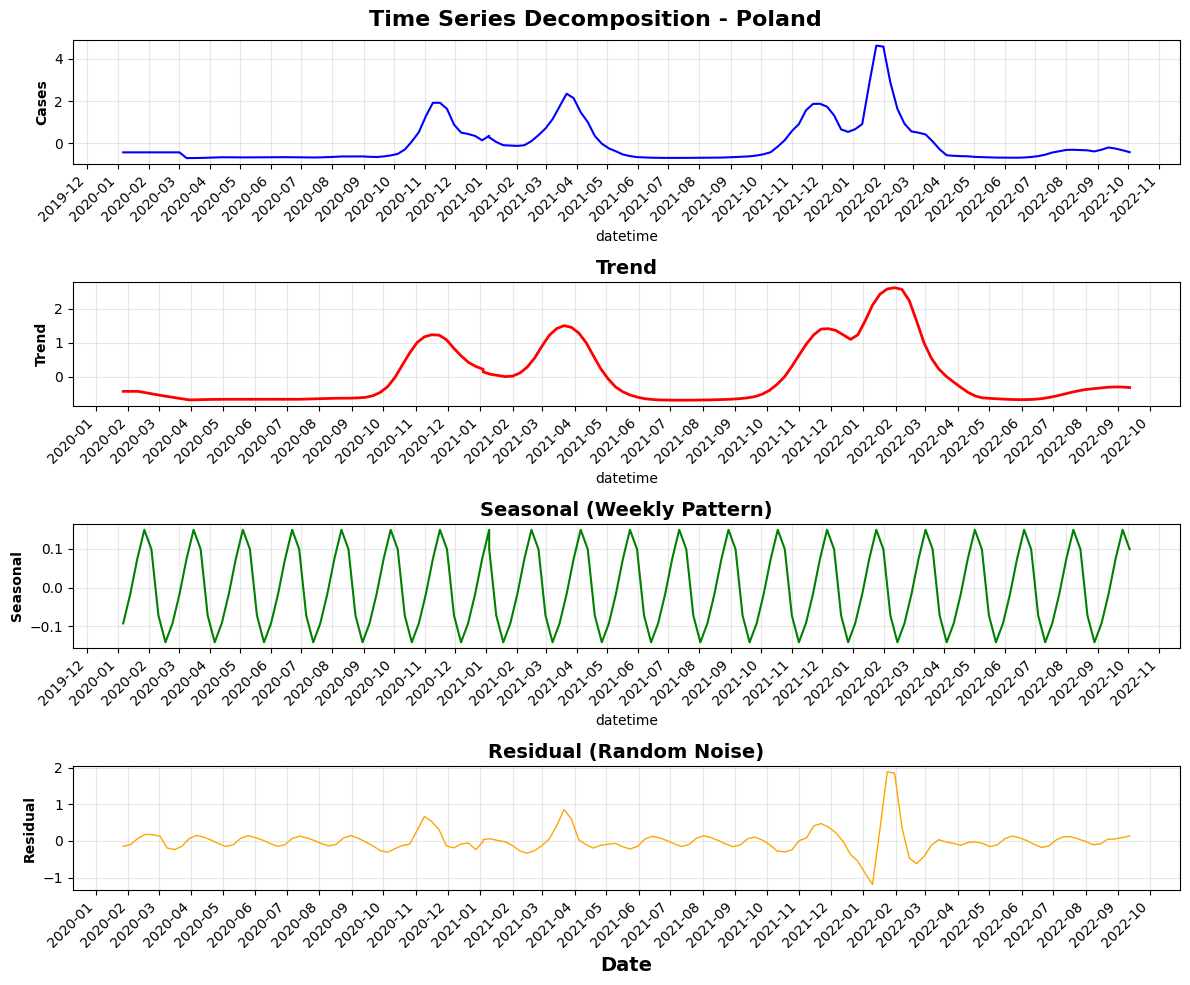


 Decomposing time series for Portugal


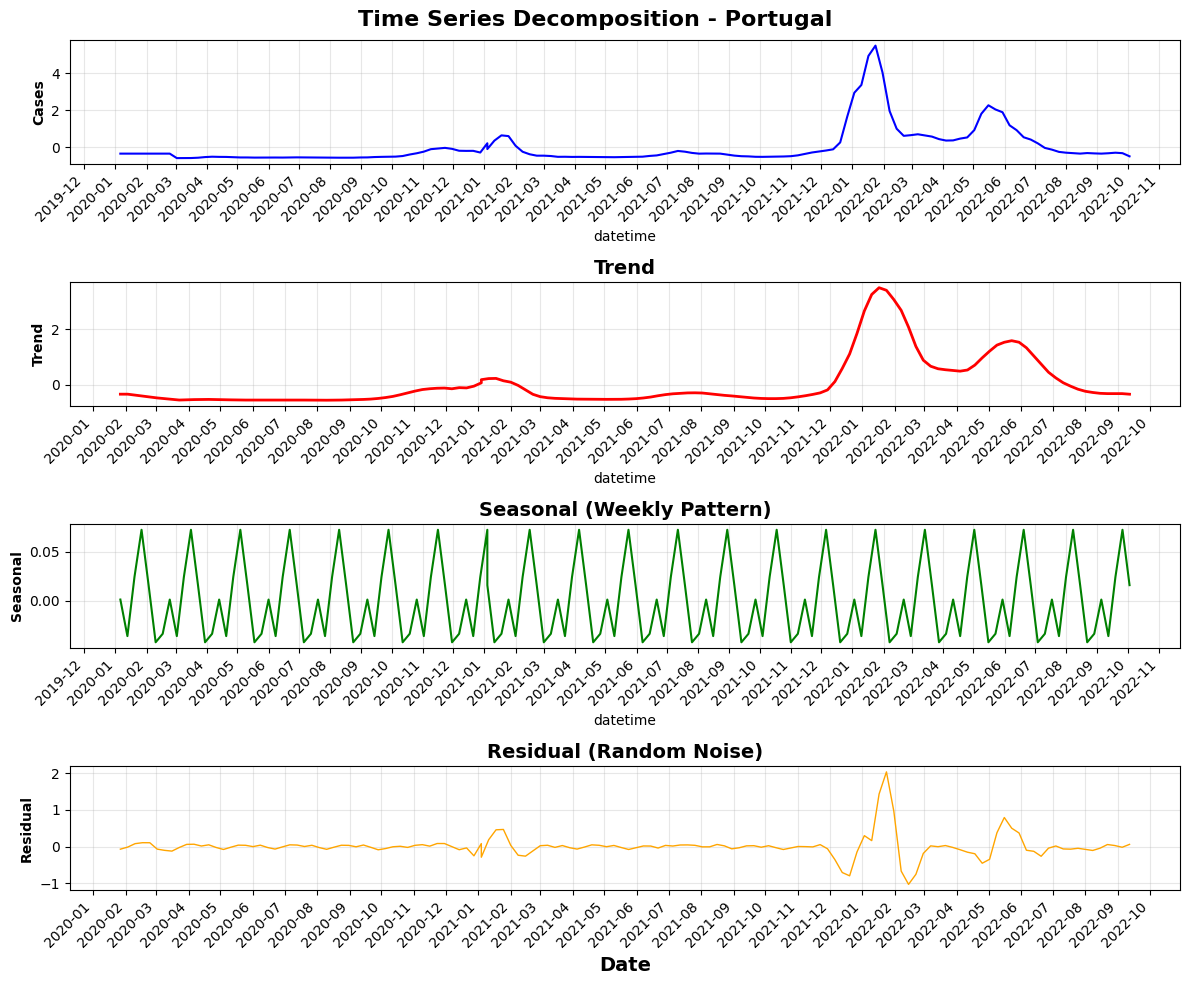


 Decomposing time series for Romania


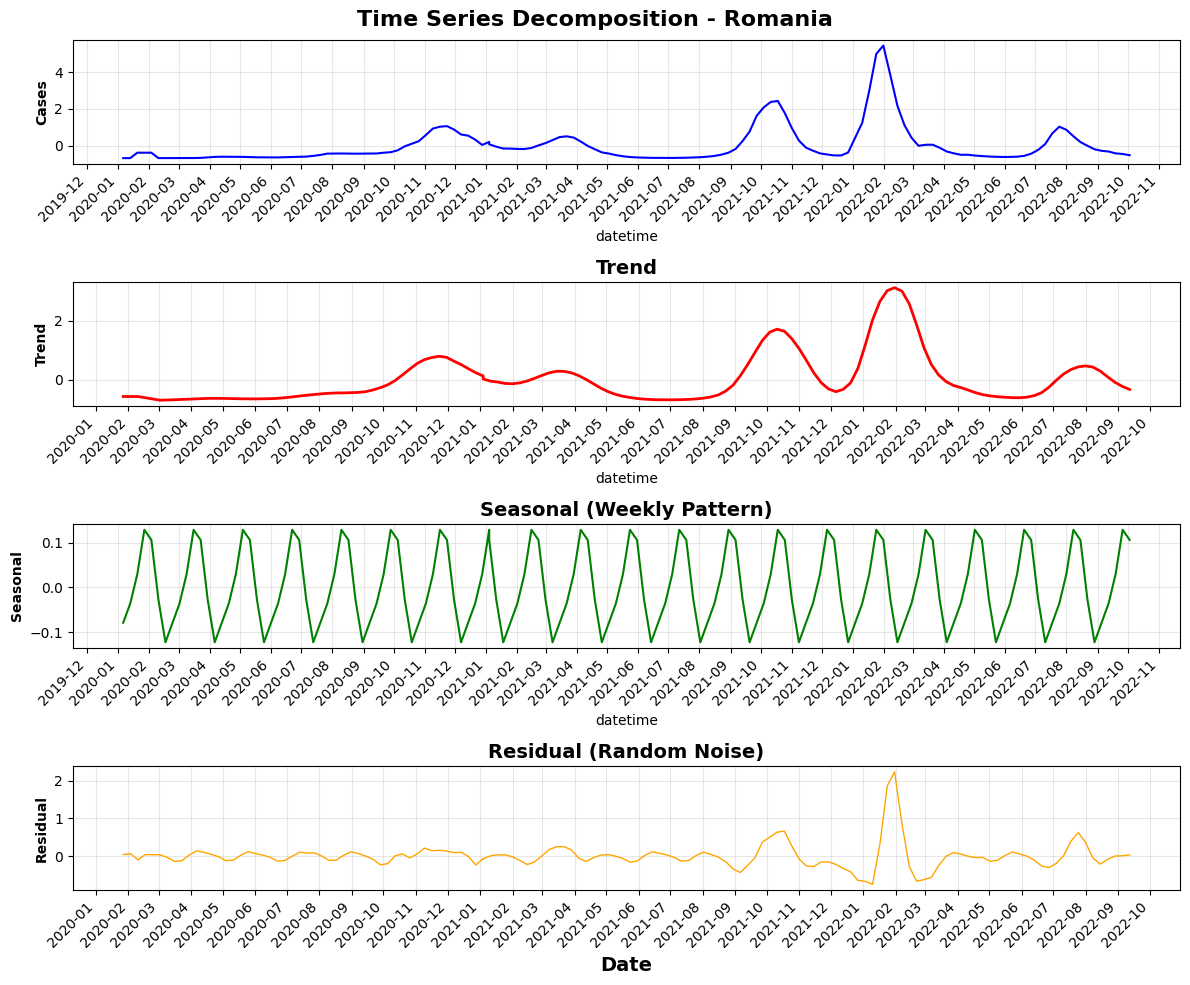


 Decomposing time series for Slovakia


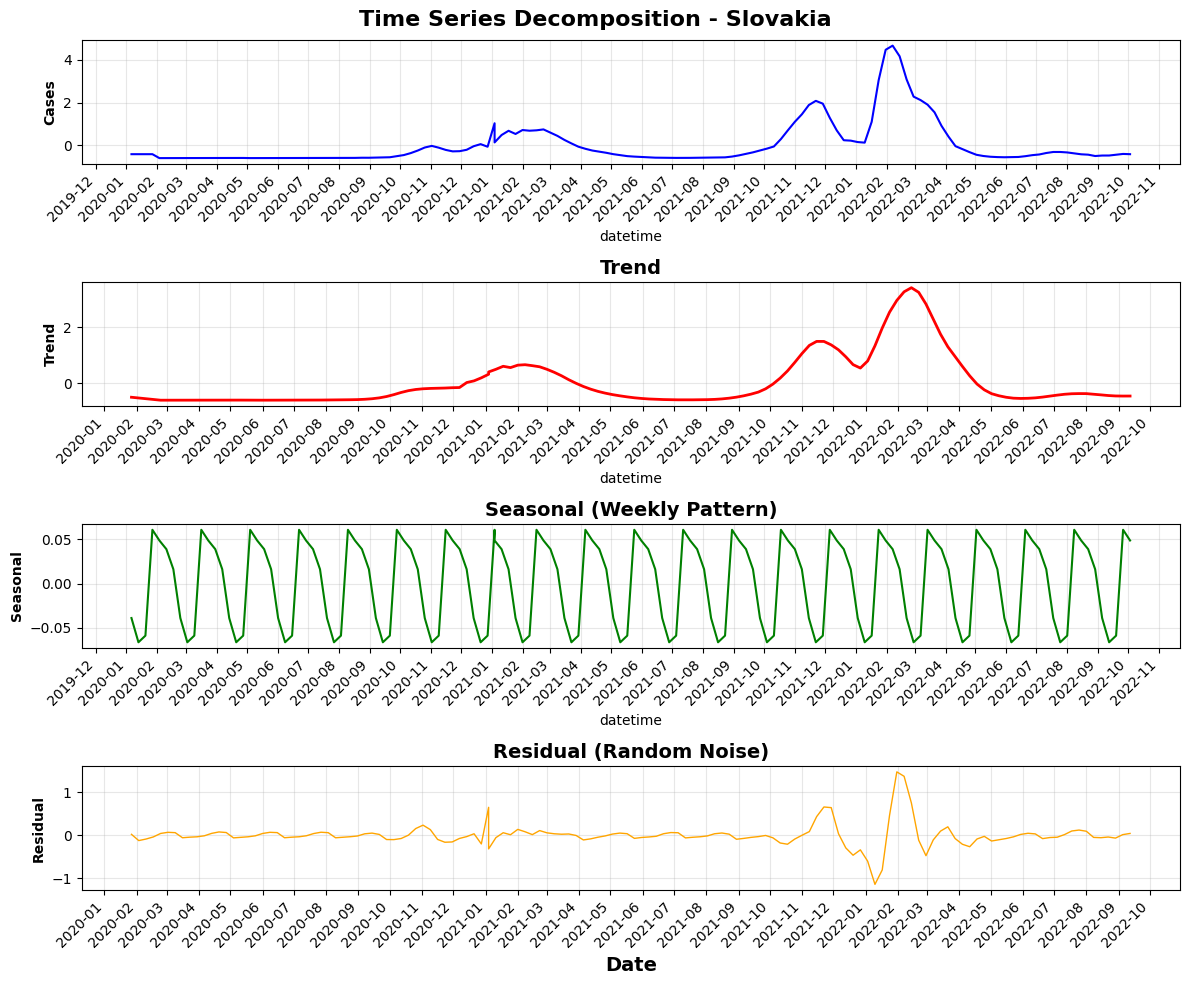


 Decomposing time series for Slovenia


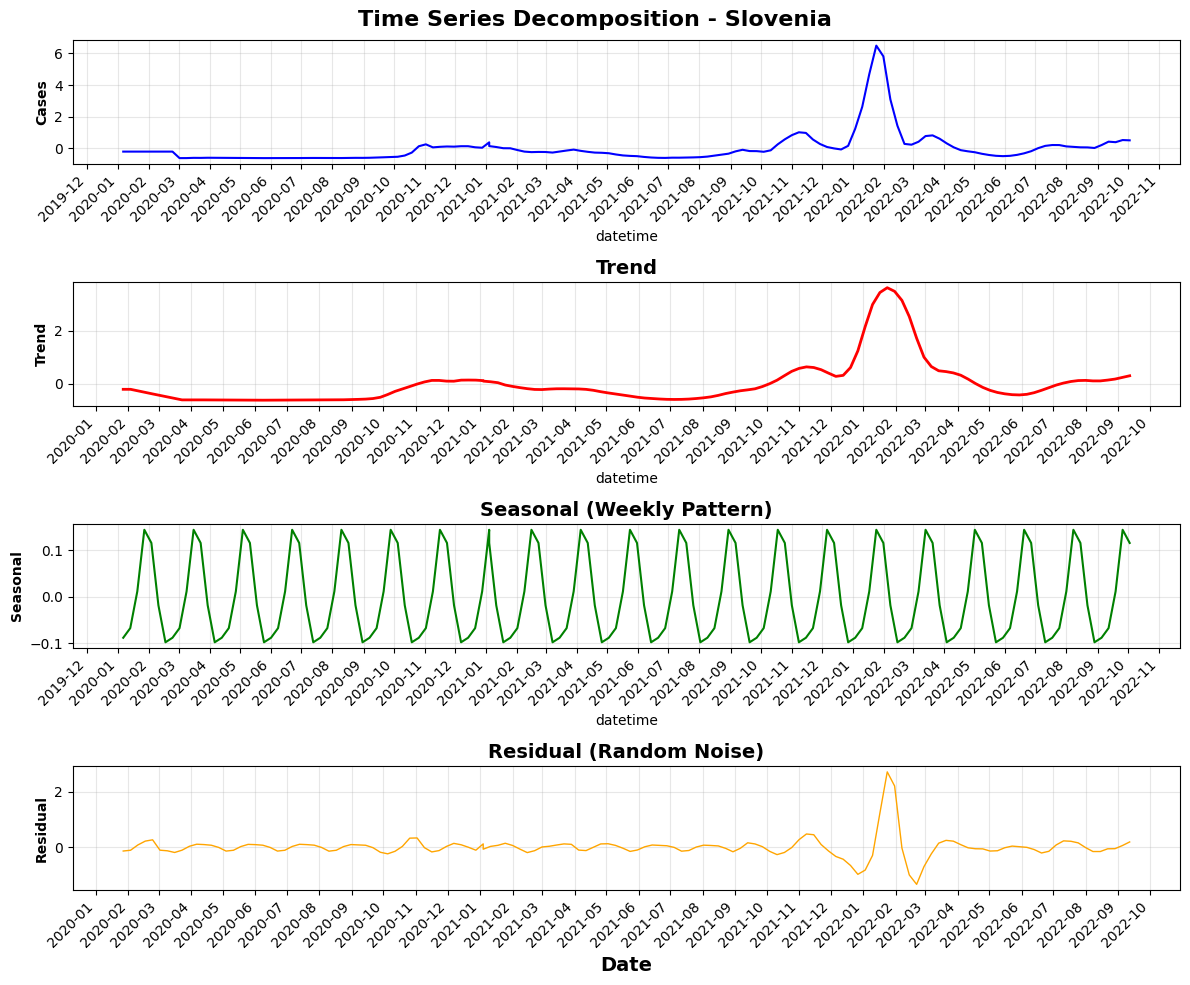


 Decomposing time series for Spain


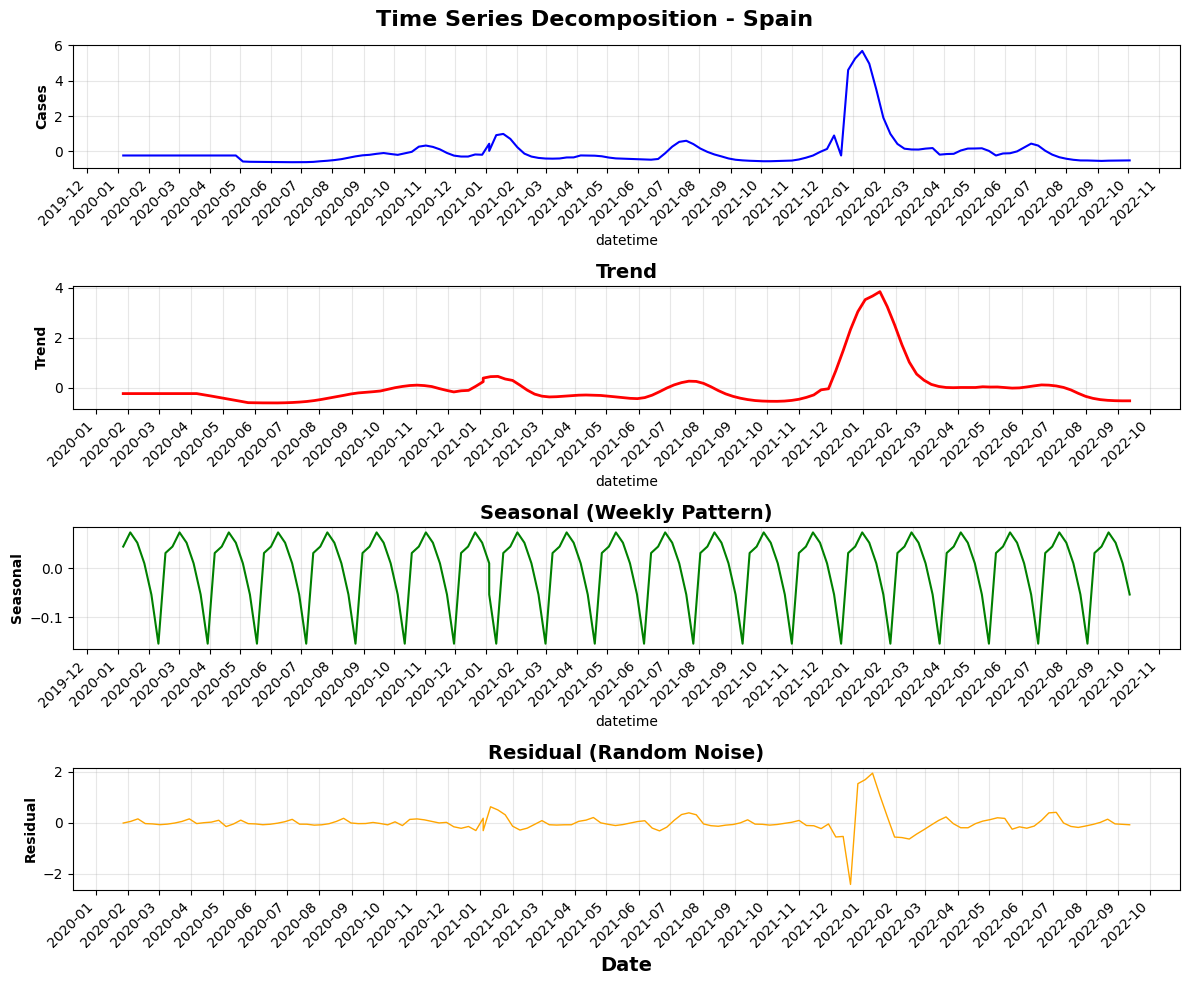


 Decomposing time series for Sweden


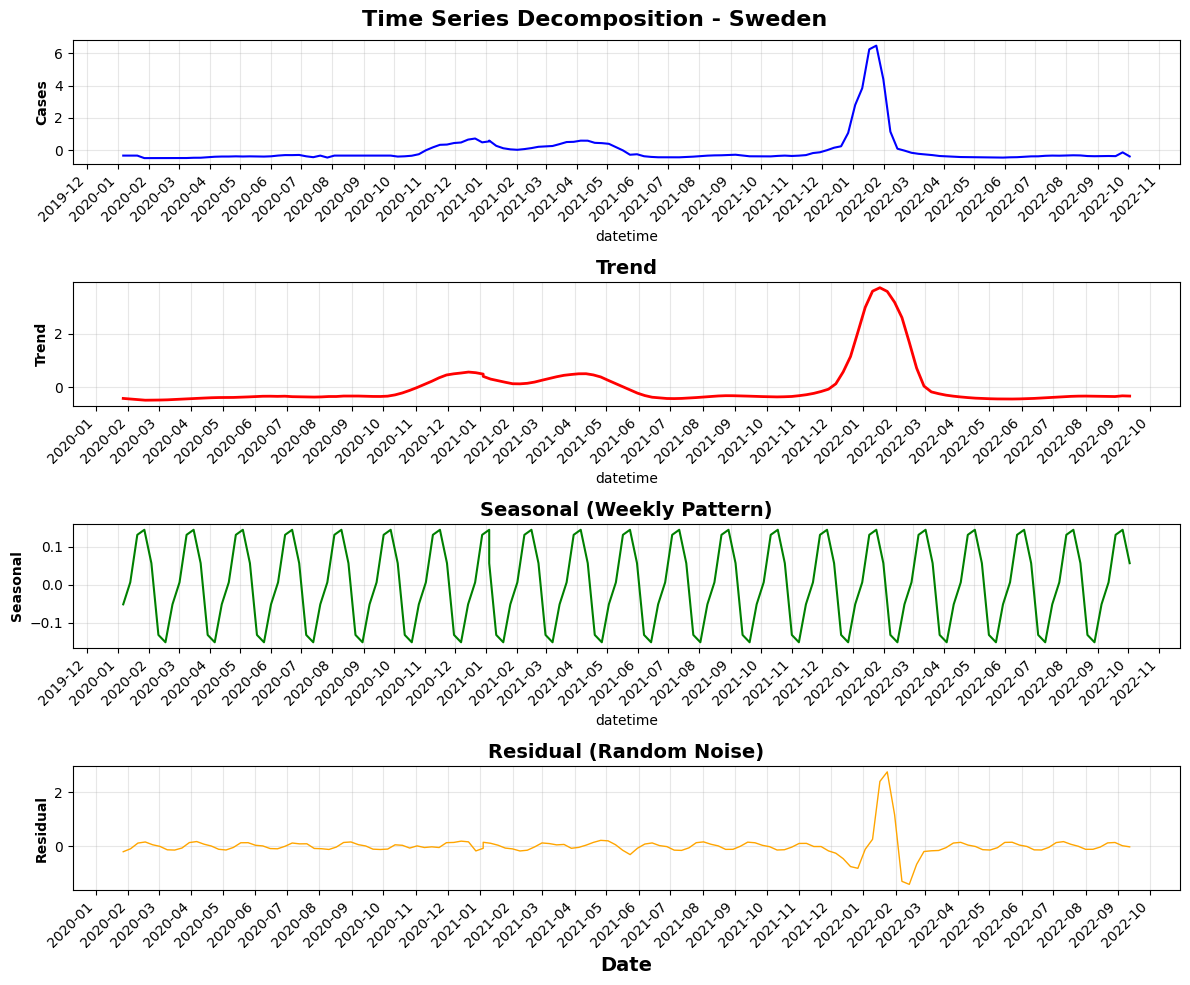

In [ ]:

for country in scaled_data['country'].unique():
    print(f"\n Decomposing time series for {country}")

    country_data = scaled_data[scaled_data['country'] == country].sort_values('datetime')
    country_data.set_index('datetime', inplace=True)
    additive_decomposition = seasonal_decompose(country_data['new_cases'], model='additive', period=7)

    fig, axes = plt.subplots(4, 1, figsize=(12, 10))
    additive_decomposition.observed.plot(ax=axes[0], color='blue', linewidth=1.5)
    axes[0].set_ylabel('Cases', fontweight='bold')
    
    additive_decomposition.trend.plot(ax=axes[1], color='red', linewidth=2)
    axes[1].set_title('Trend', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Trend', fontweight='bold')
    
    additive_decomposition.seasonal.plot(ax=axes[2], color='green', linewidth=1.5)
    axes[2].set_title('Seasonal (Weekly Pattern)', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Seasonal', fontweight='bold')
    
    additive_decomposition.resid.plot(ax=axes[3], color='orange', linewidth=1)
    axes[3].set_title('Residual (Random Noise)', fontsize=14, fontweight='bold')
    axes[3].set_ylabel('Residual', fontweight='bold')
    axes[3].set_xlabel('Date', fontweight='bold', fontsize=14)
    
    for ax in axes:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Every month
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)
    plt.subplots_adjust(hspace=0.4)
    plt.xticks(fontsize=10)
    plt.suptitle(f'Time Series Decomposition - {country}', fontsize=16, fontweight='bold')
    plt.tight_layout()

    plt.show()
